# SETUP

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.ticker as ticker
import time     
import statsmodels
from scipy.stats import shapiro

import pingouin as pg
import mne
from sklearn.decomposition import FastICA
from itertools import combinations

from collections import Counter
from diptest import diptest
from sklearn.metrics import davies_bouldin_score
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp
import itertools
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import neurodsp

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import spearmanr
from matplotlib.patches import Rectangle
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_peak_search, plot_annotated_model

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.colors as cs
import matplotlib.cbook as cbook
from matplotlib import cm

# Machine Learning - Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import random

# Machine Learning - Metrics and Utilities
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler

# Signal Processing and Analysis
import scipy.signal
from neurodsp.timefrequency import *
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series
from neurodsp.plts import plot_timefrequency
from fooof import FOOOF
from fooof.plts.spectra import plot_spectrum, plot_spectra
from fooof.plts.spectra import plot_spectrum_shading, plot_spectra_shading
from mne import io, Epochs, read_evokeds
from mne.stats import permutation_cluster_1samp_test
from scikit_posthocs import posthoc_conover
from fooof import FOOOFGroup
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter

# Miscellaneous
import sklearn_extensions
from mpl_toolkits import mplot3d
from joblib import Parallel, delayed
import mat73
from tabulate import tabulate
import eeg_routines
from eeg_routines import parcellation
import warnings
from datetime import datetime
import pickle
from tqdm.notebook import tqdm 
import os 

from sklearn.decomposition import PCA
import umap.umap_ as umap


times = np.linspace(-300, 1000, 666)
expectation = np.logical_and(times > -300, times < 0)
encoding = np.logical_and(times > 0, times < 200)
decision = np.logical_and(times > 200, times < 600)
postdecision = np.logical_and(times > 600, times < 1000)
decision_postdecision = np.logical_and(times > 200, times < 1000)

df_scalp, coordinates, channel_dict, nameChans, name, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10 = eeg_routines.parcellation()
print(channel_dict)

Q = {
    'Q1': Q1,
    'Q2': Q2,
    'Q3': Q3,
    'Q4': Q4,
    'Q5': Q5,
    'Q6': Q6,
    'Q7': Q7,
    'Q8': Q8,
    'Q9': Q9,
    'Q10': Q10,
}

# Generate the current date and time string
now = datetime.now()
date = now.strftime("%Y%m%d%H%M%S")
# Define the base path
savePath = "C:\\Users\\verga\\OneDrive - Scuola Superiore Sant'Anna\\dellXXX-laptop\\temp_SSSP\\PROJECTS\\PREVIEW\\PLOTS\\"

# Create a new directory with the current date and time
experiment_dir = os.path.join(savePath, f"{date}-experiment-paper\\")
os.makedirs(f'{experiment_dir}', exist_ok=True)

print(f"Directory created: {experiment_dir}")

letters=['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']
LETTERS = letters

C:\Users\verga\AppData\Local\Temp\ipykernel_16420\2133556541.py:35: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


61
{'AF7': [68.5722, 54.83970000000001, -10.59], 'AF3': [76.83709999999999, 33.700700000000005, 21.227], 'Fp1': [83.91709999999999, 29.436700000000002, -6.990000000000001], 'Fp2': [84.89590000000003, -29.872300000000035, -7.079999999999998], 'AF4': [77.7259, -35.71230000000002, 21.956000000000007], 'AF8': [69.6568, -55.743300000000026, -10.754999999999997], 'F7': [42.474300000000014, 70.26289999999999, -11.420000000000007], 'F5': [48.03530000000002, 64.46579999999997, 16.921], 'F3': [53.111200000000004, 50.243799999999986, 42.192], 'F1': [56.9311, 27.495799999999992, 60.342], 'F2': [57.60190000000001, -29.514200000000024, 59.54], 'F4': [54.30480000000001, -51.83620000000003, 40.814], 'F6': [49.82969999999999, -67.91420000000001, 16.367], 'F8': [44.421699999999994, -73.04310000000001, -12.0], 'FT7': [14.120300000000023, 80.775, -11.135], 'FC5': [18.64330000000003, 77.21489999999997, 24.459999999999987], 'FC3': [22.716200000000008, 60.181899999999985, 55.544], 'FC1': [26.011100000000003,

# basic pars

In [2]:
# Set general font size for all text elements
plt.rcParams.update({'font.size': 11})
plt.rcParams['axes.titlesize'] = 11     # Titolo dell'asse
plt.rcParams['axes.labelsize'] = 11      # Etichette degli assi
plt.rcParams['xtick.labelsize'] = 11     # Etichette dei tick sull'asse x
plt.rcParams['ytick.labelsize'] = 11     # Etichette dei tick sull'asse y
plt.rcParams['legend.fontsize'] = 11     # Font della legenda
plt.rcParams['figure.titlesize'] = 11    # Titolo della figura

colors_HS = ['b', 'cyan', 'green']
colors_SCD = ['orange', 'cyan', 'green']
colors_MCI = ['red', 'cyan', 'green']
colors_ATN = ['purple', 'brown', 'k']


# routines

In [3]:
def remove_outliers_iqr(data):
    """Rimuove gli outliers utilizzando il metodo IQR."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [4]:
def plot_scalp(ax, mask):

    # Lista dei canali desiderati
    selected_channels = []
    for i in range(len(name)): selected_channels.append(name[i][0][0])
    
    # Indici dei canali da colorare di rosso
    red_indices = mask
    
    # Usa un montaggio standard come modello
    standard_montage = mne.channels.make_standard_montage('standard_1020')
    
    # Filtra il montaggio standard per includere solo i canali selezionati
    selected_pos = {ch: pos for ch, pos in standard_montage.get_positions()['ch_pos'].items() if ch in selected_channels}
    
    # Crea un montaggio personalizzato con i canali selezionati
    custom_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')
    
    # Ottieni i nomi dei canali nel montaggio personalizzato
    channel_names = list(custom_montage.ch_names)
    
    # Crea una mappa dei colori dei canali
    channel_colors = ['k'] * len(channel_names)  # Imposta tutti i canali al colore nero ('k')
    if mask!=None: 
        for i in red_indices:
            channel_colors[i] = 'r'  # Colora di rosso ('r') i canali con gli indici specificati
    
    # Estrai le posizioni in un array 2D (solo x e y)
    pos = np.array([custom_montage.get_positions()['ch_pos'][ch][:2] for ch in channel_names])
    
    im, _ = mne.viz.plot_topomap(data=[0]*len(channel_names), pos=pos, axes=ax, show=False, sensors=False);
    for i, (ch_name, (x, y)) in enumerate(zip(channel_names, pos)):
        ax.text(x, y, ch_name, color=channel_colors[i], ha='center', va='center')

In [5]:
def computePeakLat(times, erp, q, tlims, operator, windowInt, noPeak=False, median=False):
    
    dx = times[1] - times[0]
    dx = dx*1e3
    noPeak=False
    maskTime = np.logical_and(times> tlims[0] , times < tlims[1])
    peak, lat, integral = [], [], []

    if noPeak==False:

        for vector in erp[Q[q], :]:#[np.logical_and(times> tlims[0] , times < tlims[1])]
            #print(vector)
            peak_index = operator(vector[maskTime])
            peak.append(vector[maskTime][peak_index])
            lat.append(times[maskTime][peak_index]*1e3)
            #halfWindow =  sum(maskTime) // 2
            peak_gen = np.where(vector == vector[maskTime][peak_index])[0][0]
            indexmin = peak_gen-int(windowInt//dx)#peak_gen-halfWindow
            indexmax = peak_gen+int(windowInt//dx)#peak_gen+halfWindow
            #if indexmax >= len(vector): indexmax = len(vector)
            #if indexmin < 0: indexmin = 0
            integral.append(scipy.integrate.simpson(abs(vector[indexmin:indexmax]), dx=dx))
        
    else:
        
        for vector in erp[Q[q], :]:#[np.logical_and(times> tlims[0] , times < tlims[1])]
            peak.append(0)
            lat.append(0)
            integral.append(scipy.integrate.simpson(abs(vector[maskTime]), dx=dx))

    ope = np.mean
    peak_ = ope(peak)
    lat_ = ope(lat)
    integral_ = ope(integral)

    return peak, lat, integral, peak_, lat_, integral_

In [6]:
def computePeakLat_v2(times, erp, q, tlims, operator, windowInt, ):
    
    dx = times[1] - times[0]
    dx = dx*1e3
    noPeak=False
    maskTime = np.logical_and(times> tlims[0] , times < tlims[1])
    
    ravelPeaks=erp[Q[q]][:, maskTime].ravel()
    ravelLat=list(times[maskTime])*len(Q[q])
    peakIndex = operator(ravelPeaks)
    lat = ravelLat[peakIndex]
    peak = ravelPeaks[peakIndex]
    peakIndex_=np.where(erp[Q[q]][:, :].ravel()==peak)[0][0]
    indexmin = peakIndex_-int(windowInt//dx)#peak_gen-halfWindow
    indexmax = peakIndex_+int(windowInt//dx)#peak_gen+halfWindow
    
    integral = scipy.integrate.simpson(abs(erp[Q[q]][:, :].ravel()[indexmin:indexmax]), dx=dx)

    return peak, lat, integral

In [7]:
def computePeakLat_v3(times, erp, q, tlims, operator, windowInt, ):
    
    dx = times[1] - times[0]
    dx = dx*1e3
    maskTime = np.logical_and(times> tlims[0] , times < tlims[1])
    peaks = np.mean(erp[Q[q]], axis=0)[maskTime]
    indexPeak = operator(peaks)
    peak = peaks[indexPeak]
    lat = times[maskTime][indexPeak]
    peakGenIndex = np.where(np.mean(erp[Q[q]], axis=0)==peak)[0][0]
    indexmin = peakGenIndex-int(windowInt//dx)#peak_gen-halfWindow
    indexmax = peakGenIndex+int(windowInt//dx)#peak_gen+halfWindow
    integral = scipy.integrate.simpson(abs(np.mean(erp[Q[q]], axis=0)[indexmin:indexmax]), dx=dx)

    return peak, lat, integral

In [8]:
def computeSEEDFC_v2(seedQ, erp, encoding):
    
    # Initialize the STAT_FC list
    STAT_FC = []
          
    # Select the seed channel data
    erp = erp[:, encoding]
    seed = np.median(erp[seedQ], axis=0)
    
    # Define channels excluding the seed channels
    chanNoSeed = list(set(np.arange(61)) - set(seedQ))
    
    # Calculate Spearman correlation for each channel
    for j in chanNoSeed:
        r, p = scipy.stats.spearmanr(seed, erp[j])
        STAT_FC.append([r, p])
    
    # Convert STAT_FC to a DataFrame
    STAT_FC = pd.DataFrame(STAT_FC, columns=['r', 'p'])
    
    # Total number of channels
    tot = STAT_FC.shape[0]
    
    # Print the number of p-values less than 0.001 before correction
    print(sum(STAT_FC['p'] < 0.001))
    
    # Apply Bonferroni correction
    STAT_FC['p'] = statsmodels.stats.multitest.multipletests(STAT_FC['p'], method='bonferroni')[1]
    
    # Print the number of p-values less than 0.001 after correction
    print(sum(STAT_FC['p'] < 0.001))
    
    # Create a mask for significant p-values
    mask = STAT_FC['p'] < 0.001
    
    # Calculate the ratio of r values greater than 0.90 among significant results
    fc_ratio = np.round(sum(STAT_FC['r'][mask] > 0.90) / tot, 2)
    
    # Calculate the median of r values among significant results
    fc_median = np.median(STAT_FC['r'][mask])
    
    # Output the ratio and median
    fc_ratio, fc_median

    return fc_ratio, fc_median

In [9]:
def computeFOOOF(fmin, fmax, f, p):

    #f = np.linspace(fmin, fmax, p.shape[0])
    fooofFmin=(f[1]-f[0])*2
    fooofFmax=fmax
    
    fm = FOOOF(peak_width_limits=(fooofFmin, fooofFmax),
                #max_n_peaks=np.inf,
                #min_peak_height=0.0,
                #peak_threshold=-3,
                aperiodic_mode='fixed',
                verbose=False,)
    fm.add_data(f, p, 
                [fmin, fmax])
    init_ap_fit = gen_aperiodic(fm.freqs, 
                                fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
    
    # Recompute the flattened spectrum using the initial aperiodic fit
    init_flat_spec = fm.power_spectrum - init_ap_fit
    
    fm.fit(f, p, [fooofFmin, fooofFmax])
    #fm.print_results()
    
    init_ap_fit=10**init_ap_fit
    init_flat_spec=10**init_flat_spec

    #x = np.arange(fmin, 100, 0.1)
    #sum_y = np.zeros_like(x)
    #for i in np.arange(fm.get_results()[1].shape[0]):
    #    y = scipy.stats.norm.pdf(x, fm.get_results()[1][0][i], fm.get_results()[4][0][i] * 0.5)
    #    sum_y += y
    #print(fm.get_results())
    
    return fm.get_results(), init_flat_spec, init_ap_fit



In [10]:
import os
import numpy as np
import pandas as pd
import mne
import scipy
from tqdm import tqdm

def loadcomputeERPv5(task, taskstimulus, dataPath):
    files = os.listdir(path=dataPath)
    target_files = [file for file in files if taskstimulus in file]

    df = []
    for file in tqdm(target_files):
        try:
            data = mne.io.read_epochs_eeglab(dataPath + file, verbose=False)
        except Exception as e:
            print(f"Errore nel leggere il file {file}: {e}")
            continue
        
        # Definizione delle finestre temporali e dell'ERP
        times = data.times
        encoding = np.logical_and(times > 0, times < 0.2)
        decision = np.logical_and(times > 0.3, times < 0.9)
        baseline = np.logical_and(times > -0.25, times < 0)
        erp = np.mean(np.asarray(data), axis=0)[:, :] * 1e+6
        ntrials = np.asarray(data).shape[0]
        print(ntrials)

        # Rimozione della tendenza, se necessario
        detrend = False
        if detrend:
            erp = scipy.signal.detrend(erp)
            erp = erp - np.mean(erp)

        # Estrazione dell'ID e del numero di eventi
        id_number = int(file.split('_')[3])
        events = len(data.events)

        # Calcolo della frequenza minima e massima
        dt = times[1] - times[0]
        fmin, fmax = 0.1, 45

        # Calcolo della PSD e dei parametri FOOOF per Q10 e Q5
        p_Q10, f = mne.time_frequency.psd_array_welch(np.mean(np.asarray(data)[:, Q10, :], axis=1).ravel(), fmin=fmin, fmax=fmax, sfreq=1/dt)
        FOOOF_pars_Q10, FOOOF_p_Q10_flat, FOOOF_p_Q10_ap = computeFOOOF(fmin, fmax, f, p_Q10)

        p_Q5, f = mne.time_frequency.psd_array_welch(np.mean(np.asarray(data)[:, Q5, :], axis=1).ravel(), fmin=fmin, fmax=fmax, sfreq=1/dt)
        FOOOF_pars_Q5, FOOOF_p_Q5_flat, FOOOF_p_Q5_ap = computeFOOOF(fmin, fmax, f, p_Q5)

        # Calcolo della FC per le fasi di encoding e decisione
        encoding_seedFC_rel, encoding_seedFC_med = computeSEEDFC_v2(Q['Q10'], erp, encoding)
        decision_seedFC_rel, decision_seedFC_med = computeSEEDFC_v2(Q['Q5'], erp, decision)

        # Calcolo dei picchi e delle latenze per diverse finestre temporali e componenti ERP
        p300peak, p300lat, p300int, p300peak_, p300lat_, p300int_ = computePeakLat(times, erp, 'Q5', [0.300, 0.500], np.argmax, 100, noPeak=False)
        p600peak, p600lat, p600int, p600peak_, p600lat_, p600int_ = computePeakLat(times, erp, 'Q5', [0.500, 0.750], np.argmax, 100, noPeak=False)
        p900peak, p900lat, p900int, p900peak_, p900lat_, p900int_ = computePeakLat(times, erp, 'Q5', [0.800, 1], np.argmax, 100, noPeak=False)
        #ptotCpeak, ptotClat, ptotCint = computePeakLat(times, erp, 'Q5', [0.300, 1], np.argmax, 150, noPeak=False)
        p1peak, p1lat, p1int, p1peak_, p1lat_, p1int_ = computePeakLat(times, erp, 'Q10', [0, 0.125], np.argmax, 50, noPeak=False)
        n1peak, n1lat, n1int, n1peak_, n1lat_, n1int_ = computePeakLat(times, erp, 'Q10', [0, 0.250], np.argmin, 100, noPeak=False)
        p2peak, p2lat, p2int, p2peak_, p2lat_, p2int_ = computePeakLat(times, erp, 'Q10', [0.150, 0.250], np.argmax, 200, noPeak=False)
        
        # Stampa informazioni sul file processato
        print(f'id={id_number} | {file.split('_')[1]} | {file.split('_')[2]} | events={events} | times={len(data.times)} | dt={dt}')
        
        # Append dei dati al DataFrame
        df.append([
            
            id_number,
            erp,
            ntrials,
            p300peak, p300lat, p300int,
            p600peak, p600lat, p600int,
            p900peak, p900lat, p900int,
            p1peak, p1lat, p1int,
            n1peak, n1lat, n1int,
            p2peak, p2lat, p2int,

            p300peak_, p300lat_, p300int_,
            p600peak_, p600lat_, p600int_,
            p900peak_, p900lat_, p900int_,
            p1peak_, p1lat_, p1int_,
            n1peak_, n1lat_, n1int_,
            p2peak_, p2lat_, p2int_,

            encoding_seedFC_med, encoding_seedFC_rel,
            decision_seedFC_med, decision_seedFC_rel,
            
            f,
            p_Q10,
            FOOOF_pars_Q10, FOOOF_pars_Q10[0][0], FOOOF_pars_Q10[0][1],
            FOOOF_p_Q10_flat, FOOOF_p_Q10_ap,
            p_Q5,
            FOOOF_pars_Q5, FOOOF_pars_Q5[0][0], FOOOF_pars_Q5[0][1],
            FOOOF_p_Q5_flat, FOOOF_p_Q5_ap,
            events,
            times
        ])
    print(len(df))
    # Creazione del DataFrame finale
    df = pd.DataFrame(data=df, columns=[
        'ID_DONGNOCCHI',
        f'{task}_ERP',
        f'{task}_TRIALS',
        f'{task}_P300_PEAK_C', f'{task}_P300_LAT_C', f'{task}_P300_INTEGRAL_C',
        f'{task}_P600_PEAK_C', f'{task}_P600_LAT_C', f'{task}_P600_INTEGRAL_C',
        f'{task}_P900_PEAK_C', f'{task}_P900_LAT_C', f'{task}_P900_INTEGRAL_C',
        f'{task}_P1_PEAK_O', f'{task}_P1_LAT_O', f'{task}_P1_INTEGRAL_O',
        f'{task}_N1_PEAK_O', f'{task}_N1_LAT_O', f'{task}_N1_INTEGRAL_O',
        f'{task}_P2_PEAK_O', f'{task}_P2_LAT_O', f'{task}_P2_INTEGRAL_O',

        f'{task}_P300_PEAK_C_mean', f'{task}_P300_LAT_C_mean', f'{task}_P300_INTEGRAL_C_mean',
        f'{task}_P600_PEAK_C_mean', f'{task}_P600_LAT_C_mean', f'{task}_P600_INTEGRAL_C_mean',
        f'{task}_P900_PEAK_C_mean', f'{task}_P900_LAT_C_mean', f'{task}_P900_INTEGRAL_C_mean',
        f'{task}_P1_PEAK_O_mean', f'{task}_P1_LAT_O_mean', f'{task}_P1_INTEGRAL_O_mean',
        f'{task}_N1_PEAK_O_mean', f'{task}_N1_LAT_O_mean', f'{task}_N1_INTEGRAL_O_mean',
        f'{task}_P2_PEAK_O_mean', f'{task}_P2_LAT_O_mean', f'{task}_P2_INTEGRAL_O_mean',
       
        f'{task}_OSFC_MED_O', f'{task}_OSFC_REL_O',
        f'{task}_CSFC_MED_C', f'{task}_CSFC_REL_C',

        f'{task}_FREQ',
        f'{task}_PSD_Q10', f'{task}_FOOOF_PARS_O',
        f'{task}_FOOOF_PSD_Q10_PAR0_O', f'{task}_FOOOF_PSD_Q10_PAR1_O',
        f'{task}_FOOOF_PSD_Q10_FLAT_O', f'{task}_FOOOF_PSD_Q10_APE_O',
        f'{task}_PSD_Q5', f'{task}_FOOOF_PARS_C',
        f'{task}_FOOOF_PSD_Q5_PAR0_C', f'{task}_FOOOF_PSD_Q5_PAR1_C',
        f'{task}_FOOOF_PSD_Q5_FLAT_C', f'{task}_FOOOF_PSD_Q5_APE_C',
        f'{task}_EVENTS', f'{task}_TIMES'
    ])
    
    # Descrizione del DataFrame e dimensioni
    print(df[f'{task}_EVENTS'].describe(), df.shape, df.keys())
    
    # Correzione del valore zero nei dati ERP
    zero = np.where(df[f'{task}_ERP'][0] == 0)[1][0]
    for i in range(len(df[f'{task}_ERP'])):
        df[f'{task}_ERP'][i][:, zero] = np.mean(df[f'{task}_ERP'][i][:, zero-10:zero+10], axis=1)

    return df


In [11]:
# Specify the path to your .pkl file
file_path = r"C:\Users\verga\OneDrive - Scuola Superiore Sant'Anna\dellXXX-laptop\temp_SSSP\PROJECTS\PREVIEW\Papers\3CVT\SUBMISSIONS\NEUROIMAGE_C\ELEMENTS\20240713162159-experiment-paper\20240713162758_ALLDATA_backup.pkl"

# Open the file in binary read mode and load its contents
with open(file_path, 'rb') as file:
    df_merge = pickle.load(file)

# for each feats here decide the data reduction from channels

## dictionary

In [12]:
FEATURES={}

FEATURES['LEASURE_TIME']=['INTELLET media','SOCIALI media','FISICHE media',]
FEATURES['PSYCHO']=['energia','amic','coscienz','stabmot','apert ment',]

FEATURES['VISUO_ATTENTIVE'] = ['Trail Making Test B-A', 'Trail Making Test parte A', 'Trail Making Test parte B', 'Matrici Attentive Corrette']
FEATURES['CLINICAL_A'] = ['TIB', 'Age at onset', 'Family history of AD']

FEATURES['CLINICAL_B'] = ['MMSE', 'Education', 'Corrected_Age']


FEATURES['TCVT_PERFORMANCE']=['TCVT_ACC', 'TCVT_RT', 'TCVT_FMEASURE']

FEATURES['ERP_INT']=['TCVT_P1_INTEGRAL_O', 'TCVT_P2_INTEGRAL_O', 
                     'TCVT_N1_INTEGRAL_O', 'TCVT_P300_INTEGRAL_C',
                     #'TCVT_PTOT_INTEGRAL_O', 'TCVT_PTOT_INTEGRAL_C',
                     'TCVT_P600_INTEGRAL_C','TCVT_P900_INTEGRAL_C']

FEATURES['ERP_PEAK']=['TCVT_P1_PEAK_O', 'TCVT_P2_PEAK_O', 
                     'TCVT_N1_PEAK_O', 'TCVT_P300_PEAK_C',
                     'TCVT_P600_PEAK_C', 'TCVT_P900_PEAK_C']

FEATURES['ERP_LAT']=['TCVT_P1_LAT_O', 'TCVT_P2_LAT_O', 
                     'TCVT_N1_LAT_O', 'TCVT_P300_LAT_C',
                     'TCVT_P600_LAT_C','TCVT_P900_LAT_C']

FEATURES['ERP_INT_mean']=['TCVT_P1_INTEGRAL_O_mean', 'TCVT_P2_INTEGRAL_O_mean', 
                     'TCVT_N1_INTEGRAL_O_mean', 'TCVT_P300_INTEGRAL_C_mean',
                     #'TCVT_PTOT_INTEGRAL_O_mean', 'TCVT_PTOT_INTEGRAL_C_mean',
                     'TCVT_P600_INTEGRAL_C_mean','TCVT_P900_INTEGRAL_C_mean']

FEATURES['ERP_PEAK_mean']=['TCVT_P1_PEAK_O_mean', 'TCVT_P2_PEAK_O_mean', 
                     'TCVT_N1_PEAK_O_mean', 'TCVT_P300_PEAK_C_mean',
                     'TCVT_P600_PEAK_C_mean', 'TCVT_P900_PEAK_C_mean']

FEATURES['ERP_LAT_mean']=['TCVT_P1_LAT_O_mean', 'TCVT_P2_LAT_O_mean', 
                     'TCVT_N1_LAT_O_mean', 'TCVT_P300_LAT_C_mean',
                     'TCVT_P600_LAT_C_mean','TCVT_P900_LAT_C_mean']

FEATURES['FC']=['TCVT_OSFC_REL_O', ] #'TCVT_CSFC_MED_C', 'TCVT_OSFC_REL_O'

FEATURES['GROUPS']=['Conditions', 'Sex', 'ATN', 'TCVT_Performance']

FEATURES['BEHAVIOUR'] = ['TCVT_FMEASURE', 'TCVT_ACC', 'TCVT_RT']

FEATURES['OFI'] =  FEATURES['GROUPS']+FEATURES['FC']+FEATURES['ERP_LAT']+FEATURES['ERP_PEAK']+FEATURES['ERP_INT']+FEATURES['TCVT_PERFORMANCE']+FEATURES['CLINICAL_A']+FEATURES['CLINICAL_B']+FEATURES['VISUO_ATTENTIVE']+FEATURES['PSYCHO']+FEATURES['LEASURE_TIME']
FEATURES['NEURAL_BE'] =  FEATURES['FC']+FEATURES['ERP_LAT_mean']+FEATURES['ERP_PEAK_mean']+FEATURES['ERP_INT_mean']+FEATURES['BEHAVIOUR']
FEATURES['NEURAL_mean'] =  FEATURES['FC']+FEATURES['ERP_LAT_mean']+FEATURES['ERP_PEAK_mean']+FEATURES['ERP_INT_mean']
FEATURES['NEURAL_noFCnoINT_mean'] =  FEATURES['ERP_LAT_mean']+FEATURES['ERP_PEAK_mean']

FEATURES['NEURAL'] =  FEATURES['ERP_LAT']+FEATURES['ERP_PEAK']+FEATURES['ERP_INT'] #FEATURES['FC']+

FEATURES['CEXT'] = FEATURES['BEHAVIOUR']+FEATURES['CLINICAL_A']+FEATURES['CLINICAL_B']+FEATURES['VISUO_ATTENTIVE']+FEATURES['PSYCHO']+FEATURES['LEASURE_TIME']


#for feat in FEATURES['OFI']: print(feat)


In [13]:
FEATURES['NEURAL']

['TCVT_P1_LAT_O',
 'TCVT_P2_LAT_O',
 'TCVT_N1_LAT_O',
 'TCVT_P300_LAT_C',
 'TCVT_P600_LAT_C',
 'TCVT_P900_LAT_C',
 'TCVT_P1_PEAK_O',
 'TCVT_P2_PEAK_O',
 'TCVT_N1_PEAK_O',
 'TCVT_P300_PEAK_C',
 'TCVT_P600_PEAK_C',
 'TCVT_P900_PEAK_C',
 'TCVT_P1_INTEGRAL_O',
 'TCVT_P2_INTEGRAL_O',
 'TCVT_N1_INTEGRAL_O',
 'TCVT_P300_INTEGRAL_C',
 'TCVT_P600_INTEGRAL_C',
 'TCVT_P900_INTEGRAL_C']

## outliers

In [14]:
subOutTot=[]

for feat in FEATURES['NEURAL_mean']:
    maskOut = abs(scipy.stats.zscore(df_merge[FEATURES['NEURAL_mean']][feat]))>3
    subOut = list(df_merge['ID_DONGNOCCHI'][np.where(maskOut==True)[0]].values)
    subOutTot+=subOut
    print(feat, sum(maskOut), subOut)

contatore = {}
for elemento in subOutTot:
    if elemento in contatore:
        contatore[elemento] += 1
    else:
        contatore[elemento] = 1
elementi_ripetuti = [elemento for elemento, count in contatore.items() if count >= 2]
print("Elementi ripetuti:", elementi_ripetuti)

TCVT_OSFC_REL_O 1 [84]
TCVT_P1_LAT_O_mean 3 [14, 21, 134]
TCVT_P2_LAT_O_mean 0 []
TCVT_N1_LAT_O_mean 4 [13, 55, 56, 104]
TCVT_P300_LAT_C_mean 0 []
TCVT_P600_LAT_C_mean 0 []
TCVT_P900_LAT_C_mean 0 []
TCVT_P1_PEAK_O_mean 3 [10, 78, 80]
TCVT_P2_PEAK_O_mean 2 [41, 178]
TCVT_N1_PEAK_O_mean 2 [112, 167]
TCVT_P300_PEAK_C_mean 4 [119, 158, 175, 187]
TCVT_P600_PEAK_C_mean 4 [59, 76, 119, 158]
TCVT_P900_PEAK_C_mean 1 [76]
TCVT_P1_INTEGRAL_O_mean 3 [39, 59, 151]
TCVT_P2_INTEGRAL_O_mean 1 [40]
TCVT_N1_INTEGRAL_O_mean 2 [76, 167]
TCVT_P300_INTEGRAL_C_mean 5 [59, 76, 119, 158, 187]
TCVT_P600_INTEGRAL_C_mean 4 [59, 76, 119, 158]
TCVT_P900_INTEGRAL_C_mean 2 [76, 86]
Elementi ripetuti: [167, 119, 158, 187, 59, 76]


In [15]:
df_merge_cleaned=df_merge[~df_merge['ID_DONGNOCCHI'].isin(elementi_ripetuti)]
print(df_merge.shape)
print(df_merge.groupby(by='Conditions').count()['ID_DONGNOCCHI'])
print(df_merge_cleaned.groupby(by='Conditions').count()['ID_DONGNOCCHI'])
print(df_merge_cleaned.shape)


(178, 485)
Conditions
HS      19
MCI     40
SCD    119
Name: ID_DONGNOCCHI, dtype: int64
Conditions
HS      19
MCI     38
SCD    115
Name: ID_DONGNOCCHI, dtype: int64
(172, 485)


In [16]:
for feat in FEATURES['NEURAL_mean']:
    print(feat, sum(scipy.stats.zscore(df_merge_cleaned[feat])>3))

TCVT_OSFC_REL_O 1
TCVT_P1_LAT_O_mean 1
TCVT_P2_LAT_O_mean 0
TCVT_N1_LAT_O_mean 3
TCVT_P300_LAT_C_mean 0
TCVT_P600_LAT_C_mean 0
TCVT_P900_LAT_C_mean 0
TCVT_P1_PEAK_O_mean 3
TCVT_P2_PEAK_O_mean 2
TCVT_N1_PEAK_O_mean 0
TCVT_P300_PEAK_C_mean 2
TCVT_P600_PEAK_C_mean 0
TCVT_P900_PEAK_C_mean 1
TCVT_P1_INTEGRAL_O_mean 4
TCVT_P2_INTEGRAL_O_mean 3
TCVT_N1_INTEGRAL_O_mean 0
TCVT_P300_INTEGRAL_C_mean 1
TCVT_P600_INTEGRAL_C_mean 0
TCVT_P900_INTEGRAL_C_mean 2


In [17]:
HS = df_merge_cleaned['Conditions']=='HS'
SCD = df_merge_cleaned['Conditions']=='SCD'
MCI = df_merge_cleaned['Conditions']=='MCI'
ATNP = df_merge_cleaned['ATN']=='Positive'
ATNN = df_merge_cleaned['ATN']=='Negative'
HP = df_merge_cleaned['TCVT_Performance']=='High'
LP = df_merge_cleaned['TCVT_Performance']=='Low'



# feat correction

In [18]:
for feat in ['NFL', 'SOCIALI media', 'INTELLET media', 'Age at onset', 'FISICHE media', 'TIB', 'MMSE', 'Education', 'TCVT_FMEASURE']:
    if feat not in ['MMSE', 'Education', 'TCVT_FMEASURE']:
        df_merge_cleaned.loc[MCI, feat] = np.where(df_merge_cleaned.loc[MCI, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[MCI, feat]), 
                                                   df_merge_cleaned.loc[MCI, feat])
        df_merge_cleaned.loc[SCD, feat] = np.where(df_merge_cleaned.loc[SCD, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[SCD, feat]), 
                                                   df_merge_cleaned.loc[SCD, feat])
    else:
        df_merge_cleaned.loc[MCI, feat] = np.where(df_merge_cleaned.loc[MCI, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[MCI, feat]), 
                                                   df_merge_cleaned.loc[MCI, feat])
        df_merge_cleaned.loc[SCD, feat] = np.where(df_merge_cleaned.loc[SCD, feat].isna(), 
                                                   np.nanmedian(df_merge_cleaned.loc[SCD, feat]), 
                                                   df_merge_cleaned.loc[SCD, feat])
        df_merge_cleaned.loc[HS, feat] = np.where(df_merge_cleaned.loc[HS, feat].isna(), 
                                                  np.nanmedian(df_merge_cleaned.loc[HS, feat]), 
                                                  df_merge_cleaned.loc[HS, feat])


# tabs

In [19]:
FEATURES.keys()

dict_keys(['LEASURE_TIME', 'PSYCHO', 'VISUO_ATTENTIVE', 'CLINICAL_A', 'CLINICAL_B', 'TCVT_PERFORMANCE', 'ERP_INT', 'ERP_PEAK', 'ERP_LAT', 'ERP_INT_mean', 'ERP_PEAK_mean', 'ERP_LAT_mean', 'FC', 'GROUPS', 'BEHAVIOUR', 'OFI', 'NEURAL_BE', 'NEURAL_mean', 'NEURAL_noFCnoINT_mean', 'NEURAL', 'CEXT'])

## tab1 paper

In [20]:
groups = 'Conditions'
tab = []

df_tab = df_merge

def simbol(pvalue):
    if pvalue>0.05: return ' '
    if 0.01<pvalue<=0.05: return '*'
    if 0.001<pvalue<=0.01: return '**'
    if 0.0001<=pvalue<=0.001: return '***'
    if pvalue<0.0001: return '****'

for mainFeat in ['BEHAVIOUR','CLINICAL_B', 'CLINICAL_A', 'VISUO_ATTENTIVE', 'LEASURE_TIME', 'PSYCHO']:   
    if mainFeat not in ['CLINICAL_B', 'BEHAVIOUR']: 
        df_tab = df_tab[df_tab['Conditions'] != 'HS']
        mci_count = sum(df_tab[groups] == 'MCI')
        scd_count = sum(df_tab[groups] == 'SCD')

    else:
        df_tab = df_tab
        hs_count = sum(df_tab[groups] == 'HS')


    for feat in FEATURES[mainFeat]:

        if feat == 'Family history of AD': 
            mci_mean = np.sum(df_tab[df_tab[groups]=='MCI'][feat])
            mci_std = '-'
            scd_mean = np.sum(df_tab[df_tab[groups]=='SCD'][feat])
            scd_std = '-'

        elif feat not in FEATURES['CLINICAL_B'] and feat not in FEATURES['BEHAVIOUR']:
            df_tab[feat].fillna(df_tab[feat].median(), inplace=True)
            statistic, pvalue = kruskal(*[df_tab[df_tab[groups] == level][feat] for level in np.unique(df_tab[groups])], nan_policy='raise')
            hs_mean = '-'
            hs_std = '-'
            scd_mean = np.mean(df_tab[df_tab[groups] == 'SCD'][feat])
            scd_std = np.std(df_tab[df_tab[groups] == 'SCD'][feat])
    
            mci_mean = np.mean(df_tab[df_tab[groups] == 'MCI'][feat])
            mci_std = np.std(df_tab[df_tab[groups] == 'MCI'][feat])
            #hs_mean = f'{hs_mean:.2f}'
            #hs_std = f'{hs_std:.2f}' 
    
            scd_mean = f'{scd_mean:.3f}'
            scd_std = f'{scd_std:.2f}'
    
            mci_mean = f'{mci_mean:.3f}'
            mci_std = f'{mci_std:.2f}'
            
        else:
        
            df_tab[feat].fillna(df_tab[feat].median(), inplace=True)
            statistic, pvalue = kruskal(*[df_tab[df_tab[groups] == level][feat] for level in np.unique(df_tab[groups])], nan_policy='raise')
            
            hs_mean = np.mean(df_tab[df_tab[groups] == 'HS'][feat])
            hs_std = np.std(df_tab[df_tab[groups] == 'HS'][feat])
    
            scd_mean = np.mean(df_tab[df_tab[groups] == 'SCD'][feat])
            scd_std = np.std(df_tab[df_tab[groups] == 'SCD'][feat])
    
            mci_mean = np.mean(df_tab[df_tab[groups] == 'MCI'][feat])
            mci_std = np.std(df_tab[df_tab[groups] == 'MCI'][feat])
    
            hs_mean = f'{hs_mean:.2f}'
            hs_std = f'{hs_std:.2f}' 
    
            scd_mean = f'{scd_mean:.3f}'
            scd_std = f'{scd_std:.2f}'
    
            mci_mean = f'{mci_mean:.3f}'
            mci_std = f'{mci_std:.2f}'

        if mainFeat=='BEHAVIOUR': mainFeat = 'Task'
        if mainFeat=='CLINICAL_B': mainFeat = 'Clinical'
        if mainFeat=='CLINICAL_A': mainFeat = 'Clinical'
        if mainFeat=='VISUO_ATTENTIVE': mainFeat = 'Visuo-attentive'
        if mainFeat=='LEASURE_TIME': mainFeat = 'Leasure time'
        if mainFeat=='PSYCHO': mainFeat = 'Psychological'
        if feat=='TCVT_ACC': feat = 'Accuracy [%]'
        if feat =='TCVT_RT': feat = 'Reaction time [s]'
        if feat == 'TCVT_FMEASURE': feat = 'F-Measure [a.u.]'
        if feat == 'Matrici Attentive Corrette': feat = 'Attentive matrices [a.u.]'
        if feat == 'INTELLET media': feat = 'Intellectual activity [a.u.]'
        if feat == 'SOCIALI media': feat = 'Social activity [a.u.]'
        if feat == 'FISICHE media': feat = 'Sport activity [a.u.]'
        if feat == 'energia': feat = 'Extraversion [a.u.]'
        if feat == 'amic': feat = 'Agreableness [a.u.]'
        if feat == 'coscienz': feat = 'Coscientiousness [a.u.]'
        if feat == 'stabmot': feat = 'Emotive stability [a.u.]'
        if feat == 'apert ment': feat = 'Openness of mind [a.u.]'
        if feat == 'Trail Making Test parte A': feat = 'Trail Making Test A [a.u.]'
        if feat == 'Trail Making Test parte B': feat = 'Trail Making Test A [a.u.]'
        if feat == 'Trail Making Test B-A': feat = 'Trail Making Test B-A [a.u.]'
        if feat == 'Age': feat = 'Age [years]'
        if feat == 'MMSE': feat = 'MMSE [a.u.]'
        if feat == 'Family history of AD': feat = 'Family history of AD [count]'
        if feat == 'TIB': feat = 'TIB [a.u]'
        if feat == 'Corrected_Age': feat = 'Age [years]'
        if feat == 'Education': feat = 'Education [years]'
        if feat == 'Age at onset': feat = 'Age at onset [years]'

        pvalue = min(pvalue*21,1)
        tab.append([mainFeat, feat, 
                    f'{hs_mean} ({hs_std})', 
                    f'{scd_mean} ({scd_std})', 
                    f'{mci_mean} ({mci_std})', 
                    f'{simbol(pvalue)}{pvalue:.2f} ({statistic:.2f})'])

tab = pd.DataFrame(tab, columns=['Class', 'Scale', f'HS (n={hs_count})', f'SCD (n={scd_count})', f'MCI (n={mci_count})', 'p(H)'])
#tab['p'] = statsmodels.stats.multitest.multipletests(tab['p'].values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
now = datetime.now()
date = now.strftime("%Y%m%d%H%M%S")
nameFile = f'{experiment_dir}{date}_TAB_{groups}_TAB1.xlsx'
tab.to_excel(nameFile, index=False)

tab

Class                         Scale     HS (n=19)  \
0              Task              F-Measure [a.u.]   0.91 (0.03)   
1              Task                  Accuracy [%]  95.37 (3.22)   
2              Task             Reaction time [s]   0.45 (0.08)   
3          Clinical                   MMSE [a.u.]  29.15 (1.09)   
4          Clinical             Education [years]  14.95 (3.32)   
5          Clinical                   Age [years]  62.53 (5.08)   
6          Clinical                     TIB [a.u]         - (-)   
7          Clinical          Age at onset [years]         - (-)   
8          Clinical  Family history of AD [count]         - (-)   
9   Visuo-attentive  Trail Making Test B-A [a.u.]         - (-)   
10  Visuo-attentive    Trail Making Test A [a.u.]         - (-)   
11  Visuo-attentive    Trail Making Test A [a.u.]         - (-)   
12  Visuo-attentive     Attentive matrices [a.u.]         - (-)   
13     Leasure time  Intellectual activity [a.u.]         - (-)   
14     Leasure time        Social activity [a.u.]         - (-)   
15     Leasure time         Sport activity [a.u.]         - (-)   
16    Psychological           Extraversion [a.u.]         - (-)   
17    Psychological           Agreableness [a.u.]         - (-)   
18    Psychological       Coscientiousness [a.u.]         - (-)   
19    Psychological      Emotive stability [a.u.]         - (-)   
20    Psychological       Openness of mind [a.u.]         - (-)   

       SCD (n=119)        MCI (n=40)             p(H)  
0     0.900 (0.05)      0.869 (0.05)    *0.02 (14.22)  
1    94.235 (4.84)     90.025 (7.62)    *0.01 (14.62)  
2     0.464 (0.09)      0.485 (0.09)      1.00 (3.01)  
3    27.514 (2.14)     26.392 (2.40)   **0.00 (18.73)  
4    13.412 (3.65)     10.325 (3.88)  ***0.00 (23.73)  
5    65.403 (9.23)     72.750 (8.37)  ***0.00 (23.79)  
6   113.326 (3.60)    110.618 (6.38)      0.65 (4.66)  
7    56.983 (9.03)    63.300 (10.06)   **0.01 (12.85)  
8           74 (-)            25 (-)     0.15 (12.85)  
9   33.353 (35.47)  115.213 (177.39)    *0.02 (10.69)  
10  29.624 (14.37)    40.475 (39.89)      1.00 (2.67)  
11  63.084 (43.91)  155.725 (190.79)    *0.03 (10.37)  
12   51.002 (6.45)     47.812 (7.93)      0.19 (6.85)  
13   18.866 (3.38)     16.994 (5.32)      0.23 (6.51)  
14    9.039 (2.80)      8.082 (2.69)      1.00 (3.92)  
15    6.534 (2.48)      6.027 (2.27)      1.00 (0.54)  
16   45.756 (5.51)     44.375 (5.97)      1.00 (3.78)  
17   50.832 (7.59)     48.400 (6.38)      0.07 (8.63)  
18   49.887 (7.67)     49.000 (7.01)      1.00 (0.44)  
19   50.202 (7.08)     49.250 (6.91)      1.00 (2.01)  
20   46.109 (6.25)     42.725 (6.07)      0.10 (7.95)

## tab2 paper

In [21]:
def computeTab_v2(mainFeat, subMask):

    if subMask=='None':
        df_tab = df_merge_cleaned
    else: 
        df_tab = df_merge_cleaned[df_merge_cleaned['Conditions']==subMask]
        
    if mainFeat == 'ATN':
        df_tab=df_tab[df_tab[mainFeat]!='Unknown']
    
    
    conditions = df_tab[mainFeat].unique()
    
    results = []
    # Definisci una funzione per determinare il valore di 'LOCUS' in base a 'feat'
    def get_locus(value):
        if value.endswith('C'):
            return 'Central'
        else:
            return 'Occipital'
    
    # Definisci una funzione per determinare il valore di 'TYPE' in base a 'feat'
    def get_type(value):
        if 'LAT' in value:
            return 'Lat'
        elif 'PEAK' in value:
            return 'Peak'
        elif 'INTEGRAL' in value:
            return 'Int'
        elif 'FC' in value:
            return 'FC'
        else:
            return ''
    
    def get_potential(value):
        if 'N1' in value: return 'N1'
        if 'P1' in value: return 'P1'
        if 'P2' in value: return 'P2'
        if 'P300' in value: return 'P300'
        if 'P600' in value: return 'P600'
        if 'P900' in value: return 'P900'
        if 'PTOT' in value: return 'PTOT'
        if 'P900_P1' in value: return 'P900/P1'
        else: return ''
    
    def simbol(pvalue):
        if pvalue>0.05: return ' '
        if 0.01<pvalue<=0.05: return '*'
        if 0.001<pvalue<=0.01: return '**'
        if 0.0001<=pvalue<=0.001: return '***'
        if pvalue<0.0001: return '****'

    operator = np.mean
    for feat in FEATURES['NEURAL']:
        data_dict = {condition: np.stack(df_tab[df_tab[mainFeat] == condition][feat]).ravel() for condition in conditions}
        #data_dict = {condition: np.mean(np.stack(df_tab[df_tab[mainFeat] == condition][feat]), axis=1) for condition in conditions}
        
        # Esegui i test post-hoc di Mann-Whitney
        posthoc_results = {}
        for cond1, cond2 in combinations(conditions, 2):
            stat, p_mw = scipy.stats.kruskal(data_dict[cond1], data_dict[cond2])
            correction = len(conditions) if len(conditions)>=3 else 1
            p_mw = min(p_mw * correction, 1)
            posthoc_results[f'{cond1} vs {cond2} p(H)'] = f'{simbol(round(p_mw, 4))} {round(p_mw, 4)} ({round(stat,2)})'
        
        if 'FC' in feat:
            rage, page = scipy.stats.spearmanr(df_tab['Corrected_Age'], df_tab[feat])
        else:
            rage, page = scipy.stats.spearmanr(df_tab['Corrected_Age'], operator(np.stack(df_tab[feat]), axis=1))
            
        page = min(page*3, 1)
        results.append({
                        #'Locus': get_locus(feat), 
                        'Type': get_type(feat), 
                        'ERP': get_potential(feat), 
                        **{f'{i} (N={sum(df_tab[mainFeat]==i)})': f'{round(operator(data_dict[i]),2)} ({round(np.std(data_dict[i]),2)})' for i in data_dict.keys()},
                        **posthoc_results,
                        'Age p(r)': f'{simbol(round(page,4))} {round(page,4)} ({round(rage,2)})'})

        # Crea un DataFrame con i risultati
        results_df = pd.DataFrame(results)

    
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFile = f'{experiment_dir}{date}_TAB_{mainFeat}_{subMask}.xlsx'
   
    results_df.to_excel(nameFile, index=False) #sort_values(by='H', ascending=False).



    
    return results_df#.sort_values(by='H', ascending=False)




In [22]:
computeTab_v2('Conditions', 'None')


Type   ERP      SCD (N=115)       MCI (N=38)        HS (N=19)  \
0    Lat    P1    73.57 (21.95)    73.79 (15.08)    70.02 (16.78)   
1    Lat    P2   203.11 (28.76)   208.94 (28.81)   216.96 (27.75)   
2    Lat    N1   123.02 (37.47)   129.79 (25.25)   128.33 (15.29)   
3    Lat  P300    410.1 (50.35)   421.41 (55.33)   418.38 (48.41)   
4    Lat  P600   605.45 (84.83)   610.14 (81.84)   599.35 (85.84)   
5    Lat  P900   882.86 (64.27)    860.4 (64.57)   878.17 (68.41)   
6   Peak    P1      2.46 (2.08)      2.61 (1.45)      2.66 (2.06)   
7   Peak    P2      2.47 (2.46)      2.38 (3.02)       2.18 (2.6)   
8   Peak    N1     -4.54 (3.29)      -5.2 (2.45)     -7.56 (4.29)   
9   Peak  P300      1.96 (1.46)      1.53 (1.45)      2.12 (1.48)   
10  Peak  P600      1.53 (1.18)      1.72 (1.23)      1.92 (0.96)   
11  Peak  P900      0.94 (0.97)      1.04 (0.92)      1.46 (0.99)   
12   Int    P1  155.24 (103.99)   159.13 (73.05)   183.7 (115.81)   
13   Int    P2  732.62 (333.01)   826.6 (321.07)  976.17 (424.23)   
14   Int    N1  402.47 (214.06)  462.44 (203.13)  561.25 (251.41)   
15   Int  P300  278.46 (175.54)  278.18 (159.95)   333.91 (170.8)   
16   Int  P600  254.53 (177.68)   285.65 (168.7)  316.67 (168.95)   
17   Int  P900  150.38 (140.86)  181.09 (136.33)  206.24 (146.99)   

       SCD vs MCI p(H)      SCD vs HS p(H)     MCI vs HS p(H)  \
0             1 (0.44)     * 0.0486 (5.78)       0.167 (3.66)   
1        0.0617 (5.36)  *** 0.0001 (17.51)      0.1043 (4.46)   
2        0.0891 (4.73)      * 0.0455 (5.9)           1 (0.34)   
3    ** 0.0034 (10.58)       0.3485 (2.47)           1 (0.78)   
4              1 (0.8)            1 (0.46)       0.5388 (1.8)   
5     **** 0.0 (22.87)            1 (0.73)      0.0574 (5.49)   
6     ** 0.0094 (8.73)            1 (0.85)           1 (0.87)   
7             1 (0.92)            1 (0.57)           1 (0.03)   
8    *** 0.0006 (13.7)    **** 0.0 (43.85)  *** 0.0001 (17.4)   
9   *** 0.0009 (13.04)       0.5702 (1.72)  *** 0.001 (12.84)   
10     * 0.0117 (8.34)  *** 0.0002 (15.75)       0.6603 (1.5)   
11       0.1908 (3.44)    **** 0.0 (31.96)  *** 0.001 (12.79)   
12       0.1013 (4.51)       0.0686 (5.18)           1 (0.76)   
13   ** 0.0013 (12.36)    **** 0.0 (30.87)    * 0.0116 (8.34)   
14  *** 0.0005 (14.33)    **** 0.0 (33.34)   ** 0.0065 (9.39)   
15            1 (0.17)  *** 0.0009 (13.06)   ** 0.0051 (9.85)   
16      * 0.019 (7.45)  *** 0.0002 (16.02)      0.3085 (2.66)   
17  *** 0.0005 (14.09)  *** 0.0001 (16.93)      0.4285 (2.15)   

             Age p(r)  
0            1 (0.04)  
1     ** 0.007 (0.23)  
2    ** 0.0019 (0.26)  
3        0.441 (0.11)  
4       0.2889 (0.13)  
5      0.5076 (-0.11)  
6           1 (-0.04)  
7   ** 0.0066 (-0.23)  
8     * 0.0273 (-0.2)  
9     * 0.0216 (-0.2)  
10          1 (-0.02)  
11      0.9337 (0.08)  
12           1 (0.03)  
13           1 (0.05)  
14      0.3366 (0.12)  
15     0.7511 (-0.09)  
16           1 (0.01)  
17      0.1853 (0.14)

In [23]:
computeTab_v2('TCVT_Performance', 'HS')

Type   ERP      High (N=12)        Low (N=7)  High vs Low p(H)  \
0    Lat    P1    68.95 (14.84)    71.88 (19.53)   * 0.0246 (5.05)   
1    Lat    P2   215.76 (29.35)   219.03 (24.63)     0.6933 (0.16)   
2    Lat    N1   125.16 (12.14)   133.76 (18.32)      0.092 (2.84)   
3    Lat  P300   421.98 (43.94)     412.2 (54.7)     0.4447 (0.58)   
4    Lat  P600    590.85 (74.2)  613.93 (101.13)      0.5814 (0.3)   
5    Lat  P900   874.59 (66.39)    884.3 (71.31)     0.6871 (0.16)   
6   Peak    P1      2.79 (2.21)      2.42 (1.76)     0.4923 (0.47)   
7   Peak    P2      2.04 (2.19)      2.43 (3.17)     0.8896 (0.02)   
8   Peak    N1     -7.91 (4.54)     -6.97 (3.76)     0.4047 (0.69)   
9   Peak  P300      2.32 (1.44)      1.77 (1.49)     0.1824 (1.78)   
10  Peak  P600       2.13 (1.0)      1.56 (0.77)   * 0.0153 (5.89)   
11  Peak  P900       1.6 (0.87)      1.23 (1.12)  ** 0.0061 (7.53)   
12   Int    P1  195.94 (131.33)   162.73 (78.35)      0.532 (0.39)   
13   Int    P2   978.4 (394.03)  972.33 (471.49)      0.6545 (0.2)   
14   Int    N1   570.41 (279.0)  545.55 (194.24)     0.8957 (0.02)   
15   Int  P300   350.3 (176.58)  305.81 (156.46)     0.2746 (1.19)   
16   Int  P600  348.69 (177.52)  261.77 (136.67)   * 0.0182 (5.58)   
17   Int  P900  237.06 (152.65)  153.41 (119.49)  ** 0.0044 (8.12)   

            Age p(r)  
0     0.9178 (-0.25)  
1          1 (-0.03)  
2           1 (0.16)  
3           1 (0.03)  
4          1 (-0.04)  
5     0.2075 (-0.43)  
6          1 (-0.07)  
7   * 0.0458 (-0.55)  
8      0.069 (-0.52)  
9       0.6168 (0.3)  
10     0.4036 (0.36)  
11          1 (0.22)  
12     0.8674 (0.26)  
13     0.7682 (0.27)  
14     0.2232 (0.42)  
15     0.9962 (0.24)  
16      0.295 (0.39)  
17     0.5152 (0.33)

In [24]:
computeTab_v2('TCVT_Performance', 'SCD')

Type   ERP      High (N=60)       Low (N=55)    High vs Low p(H)  \
0    Lat    P1    71.97 (23.29)    75.31 (20.24)    ** 0.0018 (9.69)   
1    Lat    P2    202.32 (29.6)   203.98 (27.79)       0.5351 (0.38)   
2    Lat    N1   117.45 (34.93)    129.1 (39.15)     **** 0.0 (16.9)   
3    Lat  P300   406.63 (50.92)   413.89 (49.45)    ** 0.0092 (6.78)   
4    Lat  P600   593.35 (79.57)   618.64 (88.35)  *** 0.0009 (11.01)   
5    Lat  P900   882.16 (63.41)    883.62 (65.2)       0.7374 (0.11)   
6   Peak    P1      2.49 (2.28)      2.43 (1.85)       0.4064 (0.69)   
7   Peak    P2      2.57 (2.25)      2.36 (2.66)        0.0943 (2.8)   
8   Peak    N1     -4.71 (3.54)     -4.37 (2.99)       0.7063 (0.14)   
9   Peak  P300      2.23 (1.38)      1.66 (1.48)    **** 0.0 (24.93)   
10  Peak  P600      1.66 (1.07)      1.39 (1.28)    **** 0.0 (19.66)   
11  Peak  P900      0.96 (0.89)      0.92 (1.05)       0.1061 (2.61)   
12   Int    P1   163.29 (111.0)   146.46 (94.99)       0.2274 (1.46)   
13   Int    P2  726.72 (315.02)  739.04 (351.48)       0.8905 (0.02)   
14   Int    N1  404.16 (210.76)  400.62 (217.59)       0.8616 (0.03)   
15   Int  P300  296.39 (173.74)  258.89 (175.41)  *** 0.0007 (11.46)   
16   Int  P600  271.01 (156.36)  236.56 (196.77)    **** 0.0 (17.06)   
17   Int  P900  153.12 (126.79)   147.4 (154.69)       0.2821 (1.16)   

             Age p(r)  
0            1 (0.01)  
1    ** 0.0027 (0.31)  
2   *** 0.0001 (0.38)  
3       0.1618 (0.18)  
4       0.4813 (0.13)  
5            1 (0.03)  
6       0.452 (-0.13)  
7   ** 0.0093 (-0.27)  
8      0.1519 (-0.18)  
9      0.0795 (-0.21)  
10          1 (-0.06)  
11      0.6103 (0.12)  
12      0.8254 (-0.1)  
13          1 (-0.01)  
14           1 (0.06)  
15          1 (-0.08)  
16            1 (0.0)  
17      0.3802 (0.14)

In [25]:
computeTab_v2('TCVT_Performance', 'MCI')

Type   ERP       Low (N=26)      High (N=12)   Low vs High p(H)  \
0    Lat    P1    73.48 (15.15)     74.45 (14.9)      0.8375 (0.04)   
1    Lat    P2    213.1 (29.63)   199.93 (24.66)   ** 0.0039 (8.33)   
2    Lat    N1   127.48 (22.75)    134.8 (29.35)      0.1094 (2.56)   
3    Lat  P300    420.3 (52.29)   423.83 (61.33)       0.6527 (0.2)   
4    Lat  P600   612.66 (86.68)   604.68 (69.92)      0.5731 (0.32)   
5    Lat  P900    861.48 (68.1)   858.07 (56.08)       0.9801 (0.0)   
6   Peak    P1      2.71 (1.62)      2.42 (0.95)       0.3164 (1.0)   
7   Peak    P2      2.64 (3.09)      1.82 (2.79)      0.1804 (1.79)   
8   Peak    N1     -5.49 (2.42)     -4.57 (2.38)   ** 0.0093 (6.76)   
9   Peak  P300      1.38 (1.45)      1.84 (1.41)   ** 0.0043 (8.17)   
10  Peak  P600      1.62 (1.22)      1.95 (1.23)    * 0.0261 (4.95)   
11  Peak  P900      1.04 (0.95)      1.04 (0.87)      0.5937 (0.28)   
12   Int    P1   171.52 (78.62)   132.28 (49.51)  *** 0.001 (10.86)   
13   Int    P2  853.19 (335.23)  768.97 (279.46)      0.1146 (2.49)   
14   Int    N1  483.26 (206.22)  417.32 (188.54)    * 0.0162 (5.78)   
15   Int  P300  260.38 (155.77)   316.74 (162.1)   ** 0.0048 (7.97)   
16   Int  P600  269.14 (168.77)  321.45 (162.92)    * 0.0173 (5.67)   
17   Int  P900  175.38 (145.16)  193.45 (113.93)    * 0.0489 (3.88)   

            Age p(r)  
0            1 (0.1)  
1           1 (0.13)  
2          1 (-0.04)  
3           1 (-0.1)  
4           1 (0.12)  
5          1 (-0.16)  
6      0.3609 (0.26)  
7           1 (0.02)  
8     0.0925 (-0.35)  
9          1 (-0.13)  
10          1 (0.03)  
11           1 (0.1)  
12   * 0.0336 (0.41)  
13      0.6592 (0.2)  
14     0.2671 (0.28)  
15         1 (-0.08)  
16           1 (0.0)  
17          1 (0.06)

In [26]:
computeTab_v2('ATN', 'None')

Type   ERP  Negative (N=46)  Positive (N=12) Negative vs Positive p(H)  \
0    Lat    P1    74.26 (14.82)    74.84 (23.03)             0.5674 (0.33)   
1    Lat    P2    203.9 (29.76)   198.86 (31.43)             0.1819 (1.78)   
2    Lat    N1    129.16 (34.3)   125.78 (32.23)             0.8927 (0.02)   
3    Lat  P300   410.01 (50.91)   407.88 (45.89)              0.9853 (0.0)   
4    Lat  P600   606.23 (79.29)   614.39 (71.18)              0.3415 (0.9)   
5    Lat  P900   874.76 (63.78)   866.18 (61.79)             0.1422 (2.15)   
6   Peak    P1       2.7 (2.33)      2.36 (1.39)             0.9174 (0.01)   
7   Peak    P2      1.97 (2.55)      2.96 (3.36)             0.2014 (1.63)   
8   Peak    N1     -4.98 (2.82)     -4.53 (2.88)             0.1441 (2.13)   
9   Peak  P300      2.12 (1.49)      1.65 (1.49)             0.1187 (2.43)   
10  Peak  P600      1.75 (1.03)      1.83 (1.14)              0.4816 (0.5)   
11  Peak  P900      1.05 (0.82)      0.87 (0.61)             0.1169 (2.46)   
12   Int    P1   161.51 (97.56)   150.15 (89.06)             0.5337 (0.39)   
13   Int    P2  780.27 (341.79)   726.1 (373.19)             0.0873 (2.92)   
14   Int    N1  441.45 (207.68)  408.18 (237.51)             0.0629 (3.46)   
15   Int  P300  299.53 (182.44)  298.72 (161.38)             0.7783 (0.08)   
16   Int  P600  276.54 (167.45)  278.83 (171.26)              0.911 (0.01)   
17   Int  P900  162.96 (120.45)   125.17 (88.48)            * 0.048 (3.91)   

            Age p(r)  
0            1 (0.0)  
1           1 (0.12)  
2           1 (0.08)  
3           1 (0.11)  
4          1 (-0.05)  
5      0.839 (-0.14)  
6          1 (-0.05)  
7          1 (-0.09)  
8     0.5616 (-0.18)  
9          1 (-0.02)  
10          1 (0.13)  
11          1 (0.07)  
12          1 (0.02)  
13     0.8339 (0.14)  
14          1 (0.09)  
15     0.5389 (0.18)  
16     0.9779 (0.13)  
17          1 (0.12)

In [27]:
computeTab_v2('ATN', 'SCD')

Type   ERP  Negative (N=29)   Positive (N=5) Negative vs Positive p(H)  \
0    Lat    P1    75.38 (15.65)    69.84 (28.42)           * 0.0159 (5.81)   
1    Lat    P2   198.92 (31.12)   190.78 (30.76)               0.27 (1.22)   
2    Lat    N1   128.25 (39.43)    125.16 (44.2)             0.3197 (0.99)   
3    Lat  P300   398.28 (43.21)   405.99 (47.76)             0.6766 (0.17)   
4    Lat  P600   611.58 (82.35)   609.51 (52.72)             0.9411 (0.01)   
5    Lat  P900   878.11 (64.04)   883.46 (52.63)             0.6223 (0.24)   
6   Peak    P1      2.89 (2.71)      2.18 (1.42)             0.4531 (0.56)   
7   Peak    P2       2.2 (2.58)      2.05 (1.97)              0.9456 (0.0)   
8   Peak    N1     -4.77 (2.81)     -4.64 (3.82)             0.3897 (0.74)   
9   Peak  P300      2.31 (1.49)      2.16 (0.99)              0.9466 (0.0)   
10  Peak  P600      1.65 (1.02)      1.94 (0.75)             0.0576 (3.61)   
11  Peak  P900      0.91 (0.76)      0.98 (0.66)             0.5579 (0.34)   
12   Int    P1  167.32 (106.54)  153.43 (113.12)             0.4144 (0.67)   
13   Int    P2  762.08 (360.01)  634.74 (264.73)             0.0766 (3.14)   
14   Int    N1   440.01 (216.1)  366.66 (198.57)             0.0976 (2.74)   
15   Int  P300   295.3 (191.47)  314.78 (115.15)             0.1186 (2.44)   
16   Int  P600   261.86 (171.3)  294.16 (158.31)             0.2306 (1.44)   
17   Int  P900  139.19 (109.01)   132.77 (96.32)              0.9439 (0.0)   

            Age p(r)  
0      0.7912 (-0.2)  
1          1 (-0.06)  
2           1 (0.14)  
3           1 (0.17)  
4      0.7446 (-0.2)  
5           1 (0.01)  
6     0.7211 (-0.21)  
7          1 (-0.02)  
8          1 (-0.17)  
9        0.735 (0.2)  
10     0.4923 (0.24)  
11           1 (0.1)  
12         1 (-0.16)  
13     0.4102 (0.26)  
14          1 (0.12)  
15     0.1773 (0.33)  
16     0.3331 (0.28)  
17          1 (0.14)

In [28]:
computeTab_v2('ATN', 'MCI')

Type   ERP  Negative (N=17)   Positive (N=7) Negative vs Positive p(H)  \
0    Lat    P1    72.36 (13.06)     78.4 (17.36)          ** 0.0033 (8.65)   
1    Lat    P2   212.39 (25.11)   204.63 (30.62)             0.0801 (3.06)   
2    Lat    N1   130.72 (22.96)   126.23 (19.61)              0.842 (0.04)   
3    Lat  P300    430.03 (56.5)   409.23 (44.46)              0.0577 (3.6)   
4    Lat  P600    597.1 (72.88)   617.89 (81.68)             0.1265 (2.34)   
5    Lat  P900   869.04 (62.93)   853.84 (64.81)           * 0.0391 (4.25)   
6   Peak    P1      2.37 (1.42)      2.48 (1.35)              0.5814 (0.3)   
7   Peak    P2      1.59 (2.44)      3.61 (3.95)             * 0.05 (3.84)   
8   Peak    N1      -5.34 (2.8)     -4.45 (1.94)             0.1832 (1.77)   
9   Peak  P300      1.79 (1.44)      1.28 (1.66)             0.1374 (2.21)   
10  Peak  P600      1.93 (1.03)      1.75 (1.35)             0.3842 (0.76)   
11  Peak  P900      1.28 (0.86)      0.79 (0.56)         *** 0.0005 (12.3)   
12   Int    P1    151.6 (78.97)   147.82 (66.66)             0.8241 (0.05)   
13   Int    P2  811.29 (305.74)  791.36 (422.46)              0.292 (1.11)   
14   Int    N1  443.91 (192.45)  437.84 (257.73)             0.3054 (1.05)   
15   Int  P300  306.74 (165.68)  287.25 (186.71)             0.3336 (0.93)   
16   Int  P600  301.59 (157.56)  267.88 (179.14)             0.1873 (1.74)   
17   Int  P900  203.53 (127.98)    119.74 (82.0)        *** 0.0003 (13.15)   

           Age p(r)  
0     0.6475 (0.26)  
1     0.5873 (0.27)  
2         1 (-0.08)  
3         1 (-0.18)  
4          1 (0.09)  
5         1 (-0.02)  
6          1 (0.19)  
7         1 (-0.09)  
8         1 (-0.08)  
9         1 (-0.09)  
10         1 (0.03)  
11        1 (-0.01)  
12    0.7248 (0.25)  
13        1 (-0.05)  
14        1 (-0.01)  
15        1 (-0.01)  
16          1 (0.0)  
17         1 (0.01)

# plots

## performance

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=7.822e-01
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=6.195e-01 stat=1.596e+00
HS v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.644e-01 stat=2.908e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=8.131e-01
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.137e-03 stat=1.263e+01
HS v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.352e-02 stat=8.068e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*:

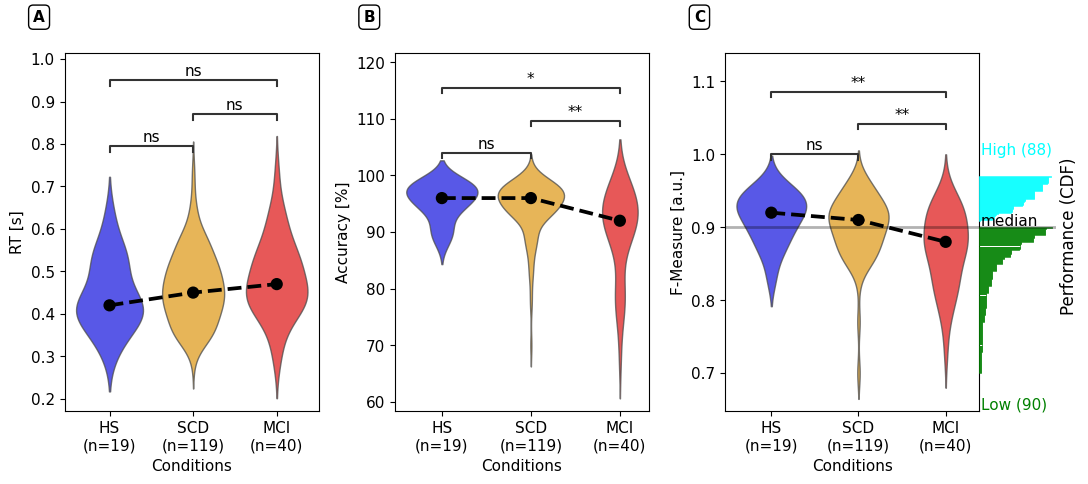

In [29]:
prefixes = ['TCVT']
suffixes = ['RT', 'ACC', 'FMEASURE']
FEATS = [f"{prefix}_{suffix}" for prefix in prefixes for suffix in suffixes]
nrows = len(prefixes)
ncols = len(suffixes)
df_plot = df_merge#_cleaned
# Calculate sample sizes and sex counts
sample_sizes = df_plot.groupby('Conditions').size()

fig, ax = plt.subplots(1, ncols, figsize=(11, 5), sharex=False)
#plt.subplots_adjust(wspace=0.75, hspace=1)
ax = ax.flatten()
order=['HS', 'SCD', 'MCI']
palette=[colors_HS[0],colors_SCD[0],colors_MCI[0]]
for idx, feat in enumerate(FEATS):

    
    r, p = scipy.stats.spearmanr(df_plot['Corrected_Age'], df_plot[feat])
    p_=p if 0.0001<p<0.05 else 'p<0.0001'
    #ax[idx].set_title(f'Age covariate (r={round(r,2)}, p={p_})')
   #sns.pointplot(data=df_merge, x='Conditions', hue='Sex', y=feat, ax=ax[idx], order=['HS', 'SCD', 'MCI'], palette=[])


    xx=sns.violinplot(data=df_plot, x='Conditions', 
                  y=feat, 
                  inner=None,
                  linewidth=1,
                  palette=palette, 
                  ax=ax[idx], order=order)
    for violin, alpha in zip(xx.collections[::1], [.75, .75, .75]):
        violin.set_alpha(alpha)

    
    sns.pointplot(data=df_plot, x='Conditions', y=feat, 
                  color='k', linestyles='--', ci=0,
                  ax=ax[idx], order=order, 
                  estimator=np.median)#,  palette=['r', 'purple', 'brown']) 
    add_stat_annotation(ax[idx], data=df_plot, x='Conditions', y=feat,  order=['HS', 'SCD', 'MCI'],
                                box_pairs=[('HS', 'SCD'), 
                                           ('SCD', 'MCI'), 
                                           ('MCI', 'HS')],
                                text_format='star',
                                test='Kruskal', loc='inside', comparisons_correction='bonferroni', verbose=2)
        

   # Extract text from tick labels and add sample sizes and sex counts
    tick_labels = [label.get_text() for label in ax[idx].get_xticklabels()]
    new_tick_labels = []
    for label in tick_labels:
        total_count = sample_sizes[label]
        new_label = f'{label}\n(n={total_count})'
        new_tick_labels.append(new_label)
    ax[idx].set_xticklabels(new_tick_labels)
    ax[idx].annotate(letters[idx], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                edgecolor='k', boxstyle='round,pad=0.3'))
    
    if idx == 0 or idx == 0+ncols:
        ax[idx].set_ylabel('RT [s]')
    if idx == 1 or idx == 1+ncols:
        ax[idx].set_ylabel('Accuracy [%]')
    if idx == 2 or idx == 2+ncols:
        ax[idx].set_ylabel('F-Measure [a.u.]')

    if idx==2: 
        ax2=ax[idx].inset_axes([1, 0, 0.3, 1])
        sns.histplot(data=df_plot[df_plot['TCVT_Performance']=='Low'], y='TCVT_FMEASURE', ax=ax2, cumulative=True, fill=False, color='green', binwidth=0.0014)#, bins=10)
        sns.histplot(data=df_plot[df_plot['TCVT_Performance']=='High'], y='TCVT_FMEASURE', ax=ax2, cumulative=True, fill=False, color='cyan', binwidth=0.0014)#, bins=10)
    
        ax2.set_ylim(ax[idx].get_ylim())
        ax2.axis('off')
        ax2.axhline(y=np.median(df_plot['TCVT_FMEASURE']), c='k', linewidth=2, alpha=.3)
        ax[idx].axhline(y=np.median(df_plot['TCVT_FMEASURE']), c='k',linewidth=2, alpha=.3)
        ax2.text(y=np.median(df_plot['TCVT_FMEASURE'])+0.002, x=1.1, s='median', c='k')
        ax2.text(y=np.median(df_plot['TCVT_FMEASURE'])-0.115, x=100, s='Performance (CDF)', c='k', rotation='vertical', fontsize=12)
    
        ax2.text(y=0.65, x=2, s=f'Low ({np.sum(df_plot['TCVT_Performance']=='Low')})', c='green')
        ax2.text(y=1, x=2, s=f'High ({np.sum(df_plot['TCVT_Performance']=='High')})', c='cyan')
    

fig.tight_layout()

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_behaviour_.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

## erp

In [30]:

def compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax, titleLegend_):
    
    dfplot = df_erpPlot
    titleLegend =  f'{titleLegend_} \n(n={dfplot.shape[0]})' 
    
    #colors = ['b', 'r', 'orange'] if mainFeat=='Conditions' else ['brown', 'yellow']
    
    order = list(np.unique(dfplot[mainFeat])) 
    labelList = order
    
    times = np.stack(dfplot['TCVT_TIMES'])[0]#.iloc[0].astype(float)  
    
    maskTime = np.logical_and(times>tmin, times<tmax)
    
    for i, level in tqdm(enumerate(labelList)): # 'High', 'Low'
        mean = np.mean(np.mean(np.stack(dfplot['TCVT_ERP'])[:, Q[q]][:, :, :], axis=1)[:, maskTime][dfplot[mainFeat]==level], axis=0)        
        sem = scipy.stats.sem(np.mean(np.stack(dfplot['TCVT_ERP'])[:, Q[q]][:, :, :], axis=1)[:, maskTime][dfplot[mainFeat]==level], axis=0)      
        ax.plot(times[maskTime]*1e3, mean, label=f'{level} (n={sum(dfplot[mainFeat]==level)})',linewidth=2.5, color=colors[i])
        ax.errorbar(times[maskTime]*1e3, y=mean, yerr=sem, alpha=0.05*1.5, c='k')
        ax.legend()
        if q == 'Q10':
            X = [90, 155, 180,]
            Y = [2.1, -5.5, 2.1]
            S = ['P1', 'N1', 'P2']
        else:
            X = [400, 600, 850]
            Y = [1.8, 1.7, 1.5]
            S = ['P300', 'P600', 'P900']
        for x, y, s in zip(X, Y,S):
            ax.text(x=x, y=y, s=s, fontsize=14)
        
    # Configurazione del grafico
    ax.set_xlabel('Time from stimulus onset [$\mathrm{ms}$]')
    ax.set_ylabel('Potential [$\mu$V]')
    qchannel = '(PO7, PO8, O1, Oz, O2)' if q=='Q10' else '(FC1, FCz, FC2, C1, Cz, C2)'
    qphase = 'Encoding' if q=='Q10' else 'Decision'
    tchannel = 'occipital' if q=='Q10' else 'central'
        
    # Posizionamento della legenda fuori dal grafico
    ax.legend(title=titleLegend, loc=loc)#, bbox_to_anchor=(0.76, 0.155))
    ax.axhline(y=0, c='k', linewidth=1)
    ax.set_xlim(tmin*1e3, tmax*1e3)
    ax.set_ylim(vmin, vmax)
    ax.grid(which='both', linestyle='-', linewidth=0.5, color='gray')
    
    do_stats=do_stat
    if do_stats:
        
        levels_=list(np.unique(dfplot[mainFeat]))
        if len(levels_) == 3:
            pvalue = []
            hvalue = []
            for t in range(times[maskTime].shape[0]):
                group1 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[0]][:, :, maskTime][:, :, t].ravel()
                group2 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[1]][:, :, maskTime][:, :, t].ravel()
                group3 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[2]][:, :, maskTime][:, :, t].ravel()
                h, p_ = scipy.stats.kruskal(group1, group2, group3)
                pvalue += [p_]
                hvalue += [h]

        if len(levels_) == 2:
            pvalue = []
            hvalue = []

            for t in range(times[maskTime].shape[0]):
                group1 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[0]][:, :, maskTime][:, :, t].ravel()
                group2 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[1]][:, :, maskTime][:, :, t].ravel()
                h, p_ = scipy.stats.kruskal(group1, group2)
                pvalue += [p_]
                hvalue += [h]
        
        do_corr=True
        if do_corr:
            _, pvalue, _, _ = statsmodels.stats.multitest.multipletests(pvalue, 
                                                                       alpha=0.05,
                                                                       method='fdr_bh', 
                                                                       is_sorted=False, 
                                                                       returnsorted=False)
            if len(levels_) == 3:
                pvalue_phoc = []

                
                """
                #for t in range(len(times[maskTime][pvalue<0.05])):
                    group1 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[0]][:, :, maskTime][:, :, pvalue<0.05][:, :, t].ravel()
                    group2 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[1]][:, :, maskTime][:, :, pvalue<0.05][:, :, t].ravel()
                    group3 = np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat]==levels_[2]][:, :, maskTime][:, :, pvalue<0.05][:, :, t].ravel()
                    f_12, p_12 = scipy.stats.kruskal(group1, group2)
                    f_13, p_13 = scipy.stats.kruskal(group1, group3)
                    f_23, p_23 = scipy.stats.kruskal(group2, group3)
                    pvalue_phoc.append([times[maskTime][pvalue<0.05][t], p_12, p_13, p_23])
                pvalue_phoc=pd.DataFrame(pvalue_phoc, columns=['t', 'p12', 'p13', 'p23'])
                """

                for t in range(len(times[maskTime][pvalue < 0.05])):
                    groups_phoc = [np.stack(dfplot['TCVT_ERP'])[:, Q[q]][dfplot[mainFeat] == levels_[i]][:, :, maskTime][:, :, pvalue < 0.05][:, :, t].ravel() for i in range(len(levels_))]
                    p_12, p_13, p_23 = [scipy.stats.kruskal(groups_phoc[i], groups_phoc[j])[1] for i in range(len(levels_)) for j in range(i+1, len(levels_))]
                    pvalue_phoc.append([times[maskTime][pvalue < 0.05][t], min(p_12*3,1), min(p_13*3,1), min(p_23*3,1)])
                pvalue_phoc = pd.DataFrame(pvalue_phoc, columns=['t', f'p_{levels_[0]}_{levels_[1]}', f'p_{levels_[0]}_{levels_[2]}', f'p_{levels_[1]}_{levels_[2]}'])

            else:
                pvalue_phoc=0
                
        axStat = ax.inset_axes([0, 1.05, 1, 0.1])
        axStat.set_xticklabels(' ')
        axStat.set_ylabel('p')
        axStat.set_xlim(ax.get_xlim())
        axStat.set_yticklabels(' ')
        axStat.twinx().set_yticks([0,1])
        axStat.plot(times[maskTime]*1e3, pvalue, c='k')
        for i in np.where(pvalue<0.05)[0]:
            if times[maskTime][i]*1e3>=50: ax.axvline(x=times[maskTime][i]*1e3, c='violet', alpha=0.15)

        axStat_ = axStat.inset_axes([0, 1.5, 1, 1])
        axStat_.set_xticklabels(' ')
        axStat_.set_ylabel('H')
        axStat_.set_xlim(ax.get_xlim())
        axStat_.set_yticklabels(' ')
        axStat_.twinx().set_yticks([0,75])
        axStat_.set_ylim(0,75)
        axStat_.plot(times[maskTime]*1e3, hvalue, c='k')       
    
        print('1', np.sort(times[maskTime][list(np.where([np.diff((pvalue<0.05)*1)==1])[1])]*1e3))
        print('-1', np.sort(times[maskTime][list(np.where([np.diff((pvalue<0.05)*1)==-1])[1])]*1e3))

    # Inset axes for scalp plot
    if do_scalp:
    
        axScalp = ax.inset_axes([0.05, 0.05, 0.2, 0.25])
        sns.scatterplot(data=df_scalp, x='X', y='Y', color='k', edgecolor=None, ax=axScalp, s=20)
        selected_chans = df_scalp.loc[Q[q], ['X', 'Y']]
        axScalp.scatter(selected_chans['X'], selected_chans['Y'], color='r', edgecolor='k', s=20)
        axScalp.axis('off')
    
    # Aggiungi lettere in alto a destra su ciascun plot
    ax.annotate(letter, xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                edgecolor='k', boxstyle='round,pad=0.3'))
    
    

    return pvalue, pvalue_phoc




### conditions

['b', 'red', 'orange']


3it [00:00, 16.19it/s]


1 [17.578125 54.6875   91.796875]
-1 [  5.859375  31.25      82.03125  191.40625 ]
p_HS_MCI had p<0.05 from 91.79688 to 187.5 for 75.51[%]
p_HS_SCD had p<0.05 from 54.6875 to 82.03125 for 57.14[%]
p_HS_SCD had p<0.05 from 91.79688 to 187.5 for 100.0[%]
p_MCI_SCD had p<0.05 from 54.6875 to 82.03125 for 100.0[%]
p_MCI_SCD had p<0.05 from 91.79688 to 187.5 for 59.18[%]
['b', 'red', 'orange']


3it [00:00, 18.39it/s]


1 [333.984375]
-1 []
p_HS_MCI had p<0.05 from 333.0 to 999.0 for 64.41[%]
p_HS_SCD had p<0.05 from 333.0 to 999.0 for 90.59[%]
p_MCI_SCD had p<0.05 from 333.0 to 999.0 for 41.47[%]


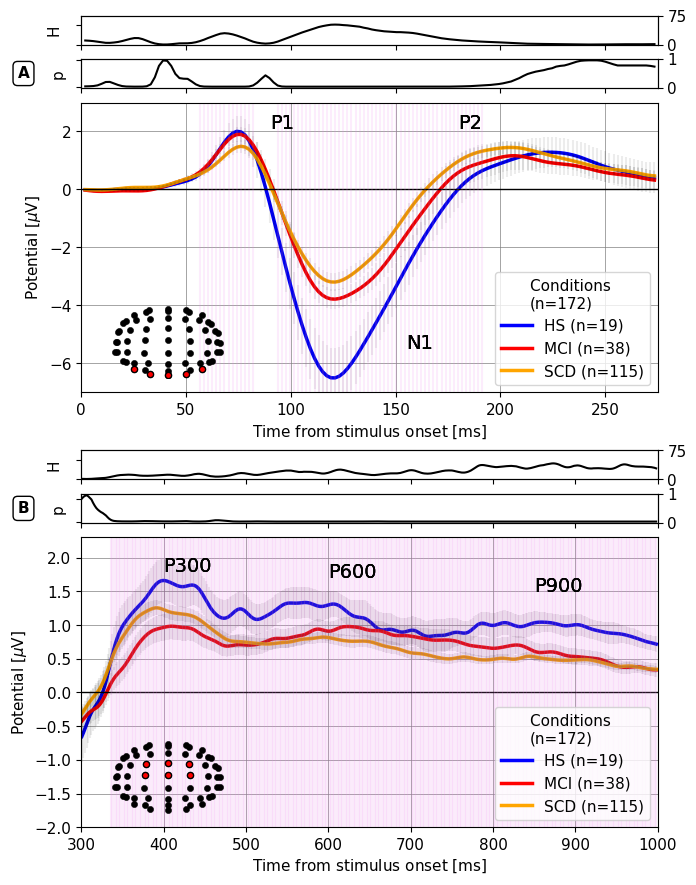

In [31]:
# multiplot

grouping = 'Conditions'
df_erpPlot = df_merge_cleaned
pvalues = []

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 2.3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [[colors_HS[0], colors_MCI[0], colors_SCD[0]]]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, 
                                             mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax,
                                             grouping)

    tph=pvalue_phoc['t']
    for m in ['p_HS_MCI', 'p_HS_SCD', 'p_MCI_SCD']:
        if q=='Q10':
            for timing in [[0.0546875, 0.08203125],[0.09179688, 0.1875]]:
                tmask = np.logical_and(tph>=timing[0], tph<=timing[1])
                perc = round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)
                if perc>0:
                    print(f'{m} had p<0.05 from {timing[0]*1000} to {timing[1]*1000} for {round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)}[%]')
        if q=='Q5':
            for timing in [[0.333, 0.999],[0,0]]:
                tmask = np.logical_and(tph>=timing[0], tph<=timing[1])
                if sum(tmask)!=0:
                    perc = round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)
                    print(f'{m} had p<0.05 from {timing[0]*1000} to {timing[1]*1000} for {round(sum(pvalue_phoc[m][tmask]<0.05)/len(pvalue_phoc[m][tmask])*100, 2)}[%]')
        
fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)  

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### performance

['cyan', 'green']


2it [00:00, 18.94it/s]


1 [ 80.078125 142.578125 259.765625 289.0625   341.796875]
-1 [107.421875 175.78125  273.4375   302.734375]
['cyan', 'green']


2it [00:00, 19.09it/s]


1 [734.375]
-1 [701.171875]


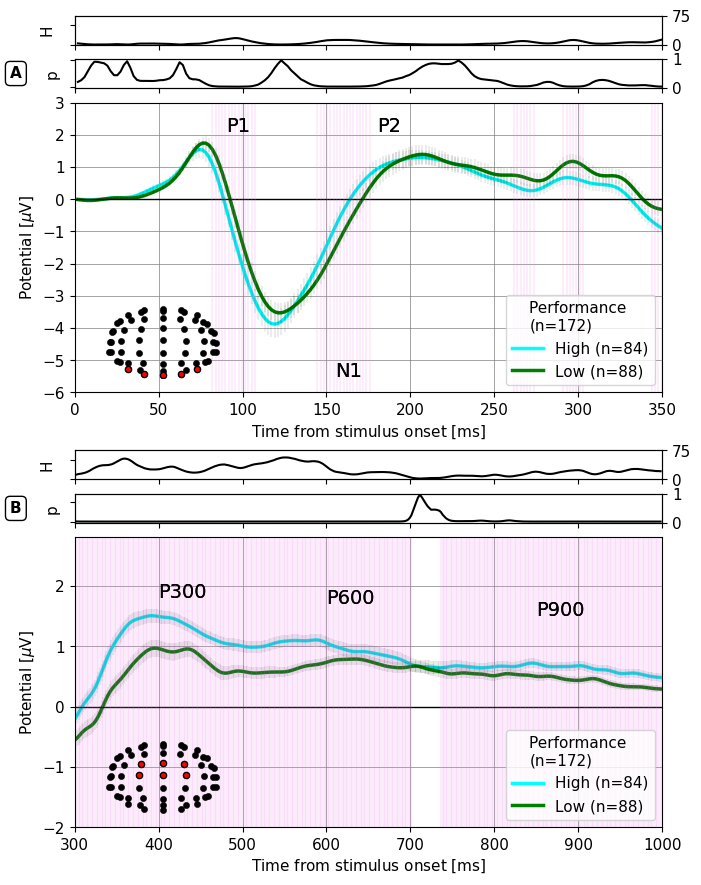

In [32]:
# multiplot

grouping = 'TCVT_Performance'
df_erpPlot = df_merge_cleaned
pvalues = []

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.35, 1],
                            [-6, -2],
                            [3, 2.8],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [['cyan', 'green'],['cyan', 'green']],
                            [df_merge[~df_merge['ID_DONGNOCCHI'].isin(elementi_ripetuti)]]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, 
                                             mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax,
                                             'Performance')
fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)  

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

HS
['cyan', 'green']


2it [00:00, 136.26it/s]


1 []
-1 []
['cyan', 'green']


2it [00:00, 69.86it/s]


1 [476.5625   507.8125   742.1875   763.671875]
-1 [482.421875 728.515625 744.140625 984.375   ]
SCD
['cyan', 'green']


2it [00:00, 19.51it/s]


1 [ 35.15625   74.21875  142.578125 292.96875  320.3125  ]
-1 [  3.90625   58.59375  109.375    179.6875   302.734375]
['cyan', 'green']


2it [00:00, 26.22it/s]


1 [666.015625 750.       794.921875 830.078125 925.78125 ]
-1 [621.09375  681.640625 775.390625 804.6875   912.109375]
MCI
['cyan', 'green']


2it [00:00, 60.36it/s]


1 [ 44.921875 115.234375 218.75    ]
-1 [ 56.640625 126.953125 316.40625 ]
['cyan', 'green']


2it [00:00, 48.01it/s]


1 [408.203125 541.015625 957.03125 ]
-1 [386.71875  423.828125 703.125    978.515625]


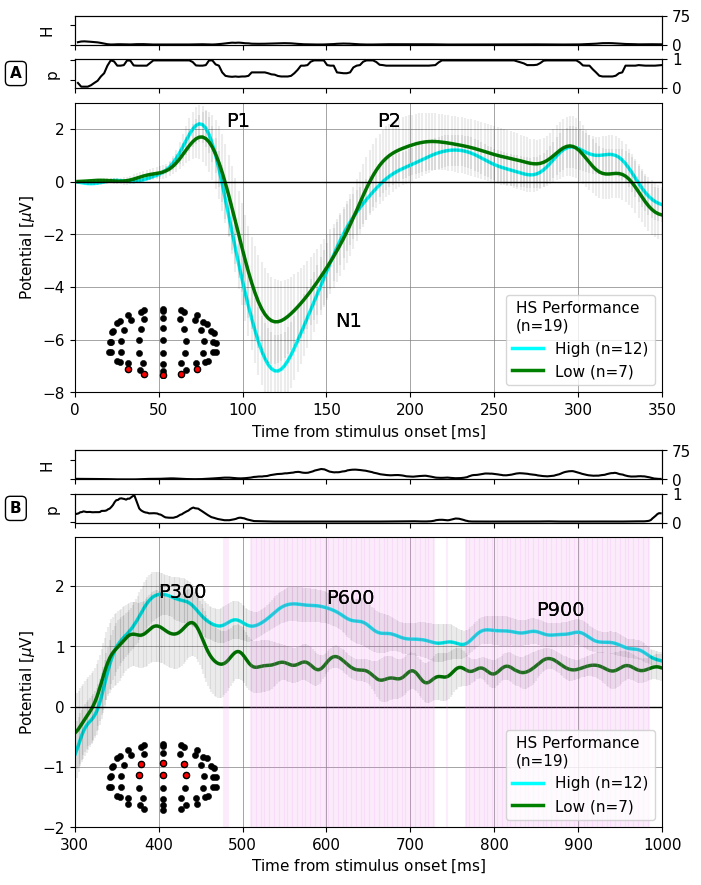

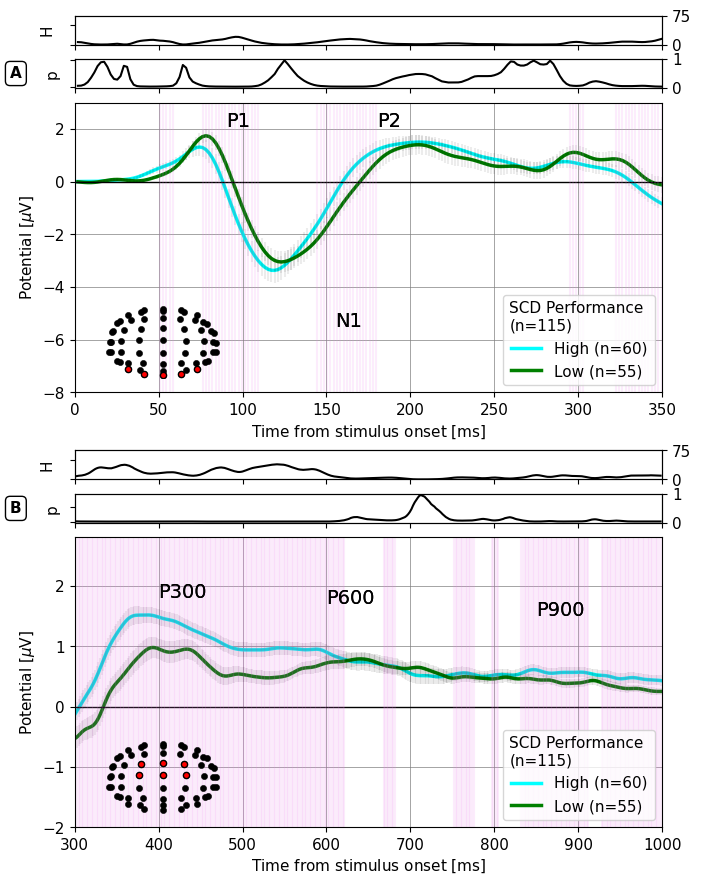

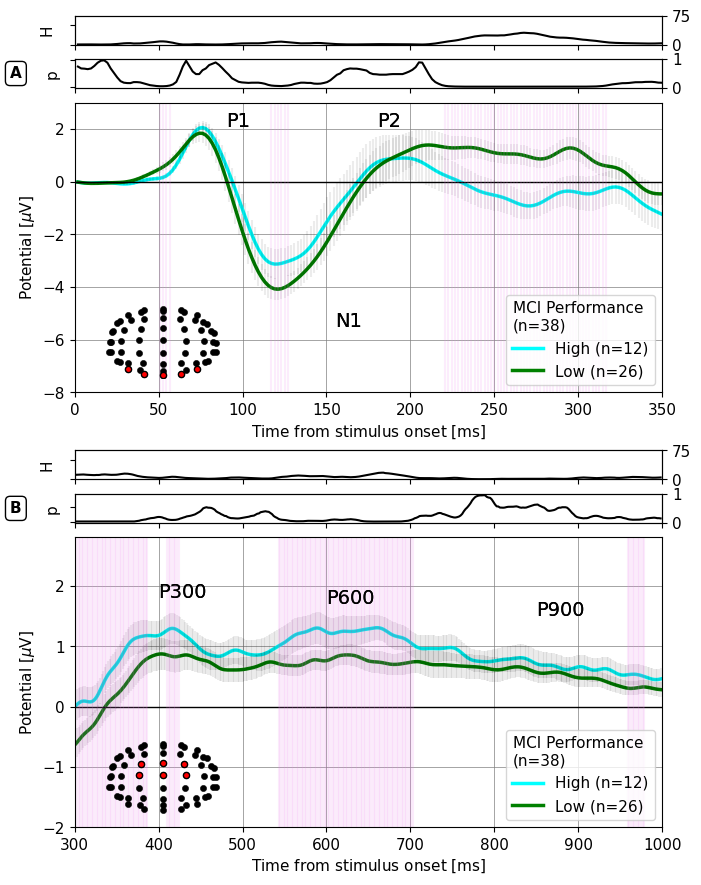

In [33]:
# multiplot

grouping = 'TCVT_Performance'
pvalues = []

for mask in ['HS', 'SCD', 'MCI']:
    print(mask)
    df_erpPlot = df_merge_cleaned
    df_erpPlot=df_erpPlot[df_erpPlot['Conditions']==mask]
    if mask=='HS': colors_ = colors_HS[1:3]#['royalblue', 'lightsteelblue']
    if mask=='SCD': colors_ = colors_HS[1:3]#['darkorange','gold']
    if mask=='MCI': colors_ = colors_HS[1:3]#['orangered','lightsalmon']
        
    fig, ax = plt.subplots(2,1, figsize=(7, 9))
    
    for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax, mask_ in zip(
                                ['Q10', 'Q5'],
                                [0, 0.3],
                                [0.35, 1],
                                [-8, -2],
                                [3, 2.8],
                                ['A', 'B'],
                                ['lower right']*2,
                                [grouping]*2,
                                [True]*2,
                                [True]*2,
                                [colors_]*2,
                                [df_erpPlot]*2,
                                [ax[0], ax[1]], [mask]*2 
                                ):
        print(colors)
        pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter, loc, 
                                                 mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax, f'{mask} Performance')
    
    fig.tight_layout()
    plt.subplots_adjust(wspace=1, hspace=0.5)  
    
    for f in ['png', 'pdf']:
        now = datetime.now()
        date = now.strftime("%Y%m%d%H%M%S")
        nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}_{mask}.{f}'
        plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### atn

['purple', 'brown', 'k']


2it [00:00, 28.26it/s]


1 []
-1 []
['purple', 'brown', 'k']


2it [00:00, 34.94it/s]


1 []
-1 []


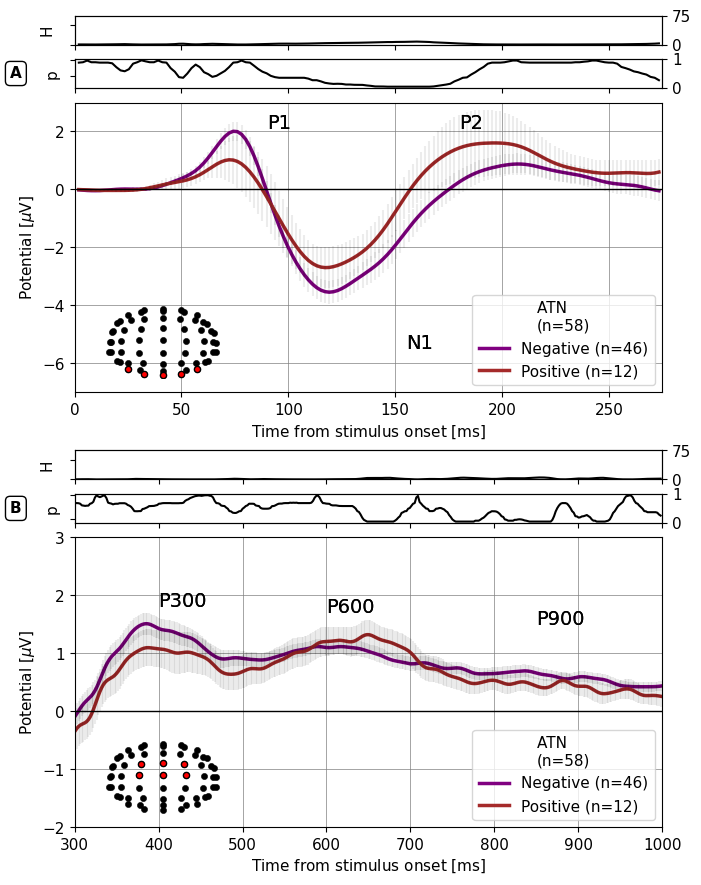

In [34]:
# multiplot

grouping = 'ATN'
pvalues = []
note = 'nan'
mask=df_merge_cleaned[grouping]!='Unknown'
df_erpPlot = df_merge_cleaned[mask]

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [colors_ATN]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter,
                                             loc, mainFeat, do_stat, do_scalp, 
                                             colors, df_erpPlot, ax,
                                             f'ATN')

fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)   

for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### atn-scd

['purple', 'brown', 'k']


2it [00:00, 49.75it/s]


1 [123.046875]
-1 [144.53125]
['purple', 'brown', 'k']


2it [00:00, 52.80it/s]


1 []
-1 []


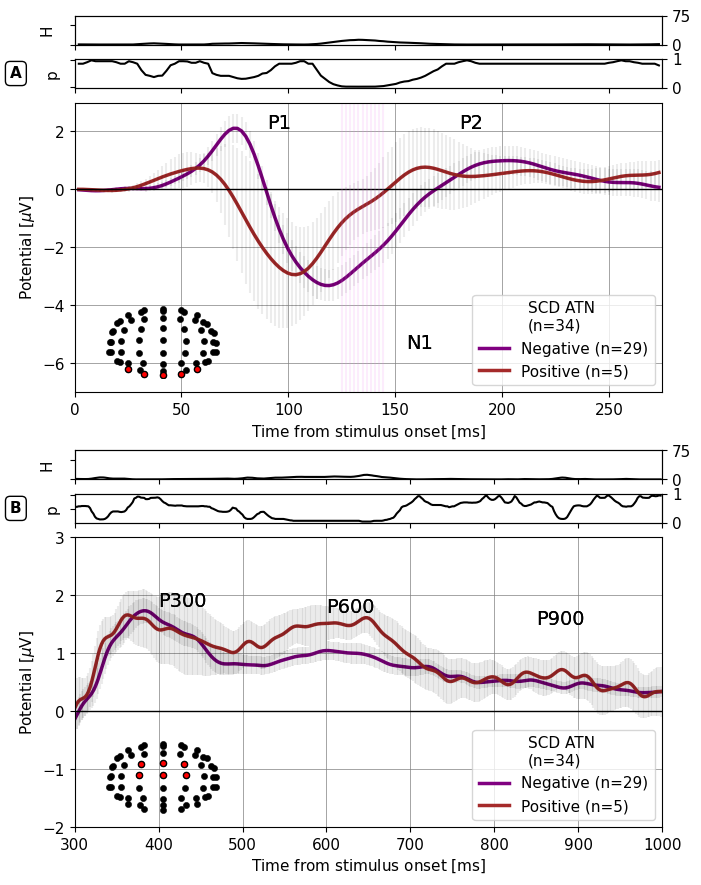

In [35]:
# multiplot

grouping = 'ATN-SCD'
SCD = df_merge_cleaned['Conditions']=='SCD'
pvalues = []
note = 'nan'
mask=df_merge_cleaned[grouping]!='Unknown'
df_erpPlot = df_merge_cleaned[mask][SCD]

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [colors_ATN]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, letter,
                                             loc, mainFeat, do_stat, do_scalp,
                                             colors, df_erpPlot, ax,
                                             f'SCD ATN')

fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)    
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### atn-mci

['purple', 'brown', 'k']


2it [00:00, 66.03it/s]


1 []
-1 []
['purple', 'brown', 'k']


2it [00:00, 79.94it/s]


1 [476.5625   750.       986.328125]
-1 [591.796875 945.3125  ]


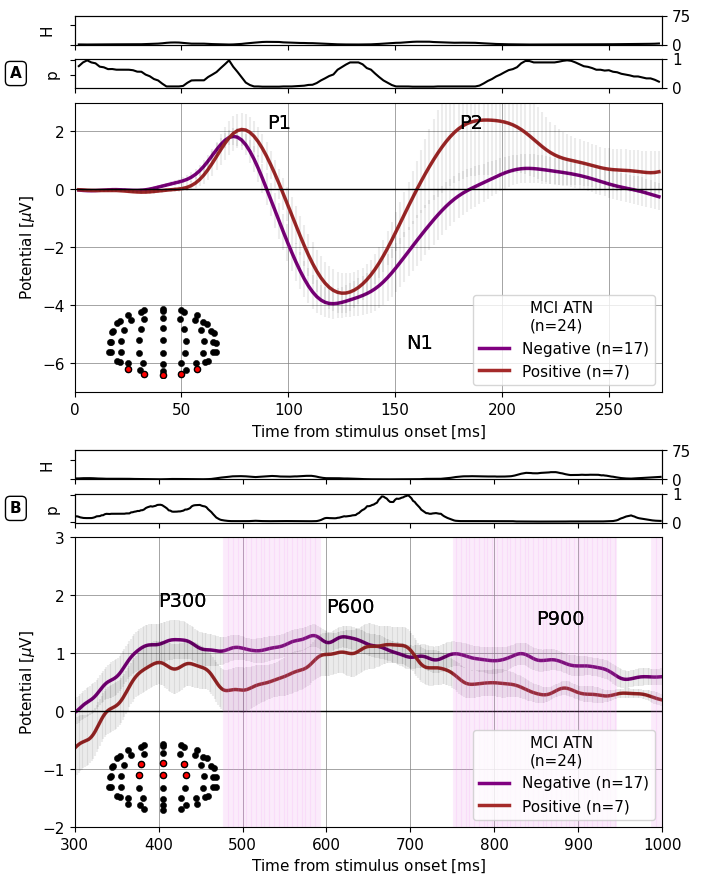

In [36]:
# multiplot

grouping = 'ATN-MCI'
pvalues = []
note = 'nan'

mask=df_merge_cleaned[grouping]!='Unknown'
df_erpPlot = df_merge_cleaned[mask][MCI]

fig, ax = plt.subplots(2,1, figsize=(7, 9))

for q, tmin, tmax, vmin, vmax, letter, loc, mainFeat, do_stat, do_scalp, colors, df_erpPlot, ax in zip(
                            ['Q10', 'Q5'],
                            [0, 0.3],
                            [0.275, 1],
                            [-7, -2],
                            [3, 3],
                            ['A', 'B'],
                            ['lower right']*2,
                            [grouping]*2,
                            [True]*2,
                            [True]*2,
                            [colors_ATN]*2,
                            [df_erpPlot]*2,
                            [ax[0], ax[1]]    
                            ):
    print(colors)
    pvalue, pvalue_phoc =  compute_multiPlot(q, tmin, tmax, vmin, vmax, 
                                             letter, loc, mainFeat, do_stat, 
                                             do_scalp, colors,
                                             df_erpPlot, ax,
                                             f'MCI ATN')

fig.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.5)    
now = datetime.now()
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_erpDynamics_{grouping}.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### followup

In [37]:
#to-do

## FC occipital

In [38]:
def plotTopoPaper(data, ax, cmap, vlim=(-2,1.5)):

    im, cn = mne.viz.plot_topomap(data,
                    outlines='head',
                    mask_params=dict(marker='o', 
                                    markerfacecolor='w', 
                                    markeredgecolor='k',
                                    linewidth=0, markersize=4),
                                  size=1, 
                    axes=ax,
                    sensors=False,
                    pos=coordinates[:, 0:2],
                    vlim=vlim,
                    cmap=cmap, 
                    mask=np.isin(np.arange(0,61), Q10),
                    show=False,
                    contours=2)
    return im, cn

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=8.210e-04 stat=1.119e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS_Low v.s. HS_High: Kruskal-Wallis paired samples with Bonferroni correction, P_val=9.591e-03 stat=6.709e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MCI_Negative v.s. MCI_Positive: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=6.542e-02
SCD_Negative v.s. SCD_Positive: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=5.399e-03
HS 0.308237378210806 0.1991779083785992
SCD 0.2072941

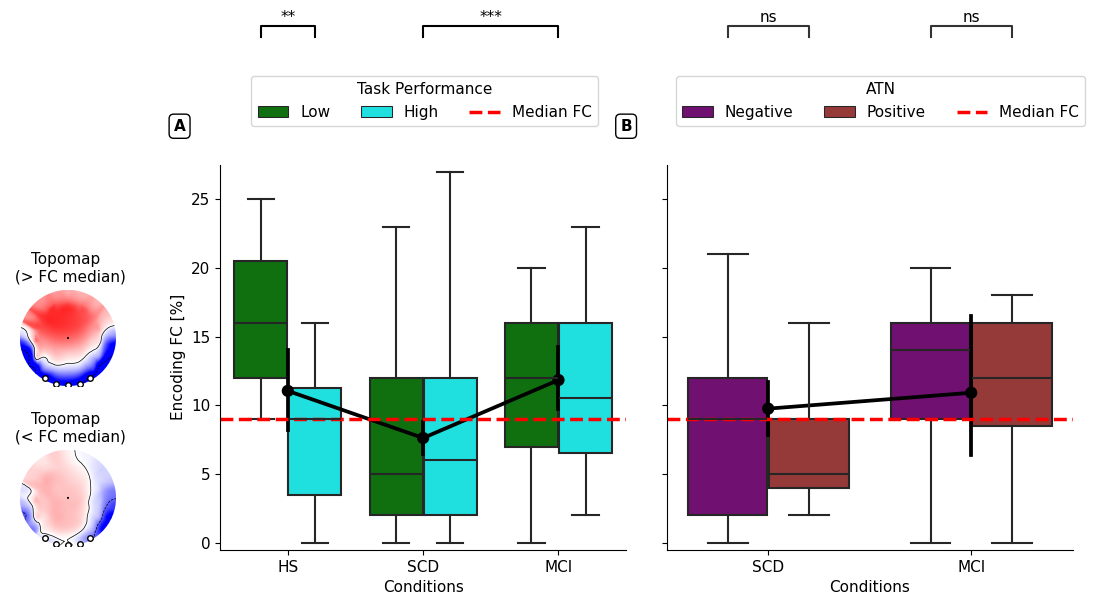

In [39]:
fig, ax = plt.subplots(1,2, figsize=(11, 5), sharey=True)
ax = ax.flatten()

xx=sns.boxplot(
            data=df_merge_cleaned, 
            ax=ax[0],
            color='k',
            hue='TCVT_Performance',
            palette=['green', 'cyan'],
            hue_order=['Low', 'High'],
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI']
)
sns.pointplot(
            data=df_merge_cleaned, 
            ax=ax[0],
            color='k',
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI']
)
test_results = add_stat_annotation(          
            data=df_merge_cleaned, 
            ax=ax[0],
            color='k',
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI'],
            box_pairs=[
#            ('HS', 'SCD'),
            ('SCD', 'MCI'),
#            ('MCI', 'HS')
            ],
            text_format='star', comparisons_correction='bonferroni',
            test='Kruskal', loc='outside', verbose=2
)
test_results = add_stat_annotation(          
            data=df_merge_cleaned, 
            hue='TCVT_Performance',
            ax=ax[0],
            color='k',
            hue_order=['Low', 'High'],
            x='Conditions', 
            y='TCVT_OSFC_REL_O', 
            order=['HS', 'SCD', 'MCI'],
            box_pairs=[
            (('HS', 'Low'),('HS', 'High')),
#            (('SCD', 'Low'),('SCD', 'High')),
#            (('MCI', 'Low'),('MCI', 'High'))
            ],
            text_format='star', comparisons_correction='bonferroni',
            test='Kruskal', loc='outside', verbose=2
)

# ATN
x='ATN'
sns.pointplot(
        data=df_merge_cleaned[df_merge_cleaned['ATN']!='Unknown'], 
        ax=ax[1],
        x=x, 
        color='k',
        order=['Negative', 'Positive'],
        y='TCVT_OSFC_REL_O'
)
sns.boxplot(
        data=df_merge_cleaned[df_merge_cleaned['ATN']!='Unknown'], 
        hue=x,
        x ='Conditions',
        palette=['purple', 'brown'],
        hue_order=['Negative', 'Positive'],
        ax=ax[1],
        order=['SCD', 'MCI'],
        y='TCVT_OSFC_REL_O'
)
test_results = add_stat_annotation(
        ax[1], 
        data=df_merge_cleaned[df_merge_cleaned['ATN']!='Unknown'], 
        x='Conditions',
        y='TCVT_OSFC_REL_O',
        order=['SCD', 'MCI'],
        hue=x,
        hue_order=['Negative', 'Positive'],
        box_pairs=[
            (('SCD', 'Negative'), ('SCD', 'Positive')),
            (('MCI', 'Positive'), ('MCI', 'Negative'))  
                  ],
        text_format='star', comparisons_correction='bonferroni',
        test='Kruskal', loc='outside', verbose=2
)


ax[0].set_ylim(-0.5, 27.5)
ax[1].set_ylabel(' ')
ax[0].set_ylabel('Encoding FC [%]')

# median
ax[0].axhline(np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.5), c='r', label='Median FC', linestyle='--', linewidth=2.5)
ax[1].axhline(np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.5), c='r', label='Median FC', linestyle='--', linewidth=2.5)

#topomap
k=0.2
VLIMS=(-5*k,5*k)

times=df_merge_cleaned['TCVT_TIMES'].iloc[0]
cmap = 'bwr'
medfc=np.logical_and(df_merge_cleaned['TCVT_OSFC_REL_O']>0,
                     df_merge_cleaned['TCVT_OSFC_REL_O']<np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.55))
ax0=ax[0].inset_axes([-0.5, 0.01, 0.25, 0.25])
dataLOWFC=np.mean(np.mean(np.stack(df_merge_cleaned['TCVT_ERP'])[medfc][:, :, np.logical_and(times>0.05, times<0.2)],axis=0), axis=1)
ax0.set_title('Topomap \n (< FC median)')
plotTopoPaper(dataLOWFC, ax0, cmap, vlim=VLIMS)
medfc=np.logical_and(df_merge_cleaned['TCVT_OSFC_REL_O']>np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 0.5), 
             df_merge_cleaned['TCVT_OSFC_REL_O']<np.quantile(df_merge_cleaned['TCVT_OSFC_REL_O'], 1))
ax1=ax[0].inset_axes([-0.5, 0.425, 0.25, 0.25])
dataHIGHFC=np.mean(np.mean(np.stack(df_merge_cleaned['TCVT_ERP'])[medfc][:, :, np.logical_and(times>0.05, times<0.2)],axis=0), axis=1)
plotTopoPaper(dataHIGHFC, ax1, cmap, vlim=VLIMS)
ax1.set_title('Topomap \n (> FC median)')

ax[0].legend(title='Task Performance', ncols=3, bbox_to_anchor=(0.95,1.25))
ax[1].legend(title=x, ncols=3, bbox_to_anchor=(1.05, 1.25))

#ax[1].legend().set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.subplots_adjust(wspace=0.1)

# letters
for i, l in enumerate(['A', 'B']):
    ax[i].annotate(l, xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
        va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
        edgecolor='k', boxstyle='round,pad=0.3'))

# savefig
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_supporting_FC_ENCODING_withPerf.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)


#
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][HS], df_merge_cleaned['Corrected_Age'][HS])
print('HS', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][SCD], df_merge_cleaned['Corrected_Age'][SCD])
print('SCD', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][MCI], df_merge_cleaned['Corrected_Age'][MCI])
print('MCI', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][ATNP], df_merge_cleaned['Corrected_Age'][ATNP])
print('ATNP', r,p)
r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][ATNN], df_merge_cleaned['Corrected_Age'][ATNN])
print('ATNN', r,p)

### correlations

In [40]:
for feat in ['NFL', 'Corrected_Age', 'Age at onset',
             'SOCIALI media', 'INTELLET media', 'FISICHE media',
             'TIB', 'MMSE', 'Education', 'TCVT_FMEASURE']:
    r, p = scipy.stats.spearmanr(df_merge_cleaned['TCVT_OSFC_REL_O'][SCD+MCI], df_merge_cleaned[feat][SCD+MCI])
    print(feat,r,p,)  

NFL 0.04969286367003428 0.541859786175207
Corrected_Age 0.25136930200111623 0.0017229336451735978
Age at onset 0.09229107586035348 0.25652654584886436
SOCIALI media -0.1794120698222293 0.02648380094496857
INTELLET media -0.03501920498853934 0.6673824491314817
FISICHE media -0.07530922173743437 0.35486237237585605
TIB -0.1217751275124898 0.13374167290994915
MMSE -0.07664985754861708 0.3463373235333721
Education -0.22605426124821018 0.004959227880033417
TCVT_FMEASURE -0.007288813836270325 0.9287485528522255


## features

In [41]:
for feat in FEATURES['NEURAL']:
    df_merge_cleaned[f'{feat}_mean_Z'] = scipy.stats.zscore(df_merge_cleaned[f'{feat}_mean'])
    df_merge_cleaned[f'{feat}_mean_ZSCD'] = (df_merge_cleaned[f'{feat}_mean'] - np.mean(df_merge_cleaned[f'{feat}_mean'][SCD])) / np.mean(df_merge_cleaned[f'{feat}_mean'][SCD])
    df_merge_cleaned[f'{feat}_mean_ZMCI'] = (df_merge_cleaned[f'{feat}_mean'] - np.mean(df_merge_cleaned[f'{feat}_mean'][MCI])) / np.mean(df_merge_cleaned[f'{feat}_mean'][MCI])
    df_merge_cleaned[f'{feat}_mean_ZHS'] = (df_merge_cleaned[f'{feat}_mean'] - np.mean(df_merge_cleaned[f'{feat}_mean'][HS])) / np.mean(df_merge_cleaned[f'{feat}_mean'][HS])


### tablemap

In [42]:
tab = []

for feat in FEATURES['NEURAL']:
    refHS = np.mean(np.stack(df_merge_cleaned[HS][feat]))
    refSCD = np.mean(np.stack(df_merge_cleaned[SCD][feat]))
    refMCI = np.mean(np.stack(df_merge_cleaned[MCI][feat]))
    refMCIHIGH = np.mean(np.stack(df_merge_cleaned[MCI][HP][feat]))
    refSCDHIGH = np.mean(np.stack(df_merge_cleaned[SCD][HP][feat]))
    refHSHIGH = np.mean(np.stack(df_merge_cleaned[HS][HP][feat]))


    for i in range(df_merge_cleaned.shape[0]):
        tab.append({'feat': feat, 
                    'featName': feat.split(sep='_')[1],
                    'featType': feat.split(sep='_')[2],
                    'featLocus': feat.split(sep='_')[3],
                    'id': df_merge_cleaned['ID_DONGNOCCHI'].iloc[i],
                    'mmse': df_merge_cleaned['MMSE'].iloc[i],
                    'ls_int': df_merge_cleaned['INTELLET media'].iloc[i],
                    'ls_soc': df_merge_cleaned['SOCIALI media'].iloc[i],
                    'ls_fis': df_merge_cleaned['FISICHE media'].iloc[i],
                    'nfl': df_merge_cleaned['NFL'].iloc[i],
                    'age': df_merge_cleaned['Corrected_Age'].iloc[i],
                    'ageOnset': df_merge_cleaned['Age at onset'].iloc[i],
                    'education': df_merge_cleaned['Education'].iloc[i],
                    'osfc': df_merge_cleaned['TCVT_OSFC_REL_O'].iloc[i],
                    'tib': df_merge_cleaned['TIB'].iloc[i],
                    'SOCIALI media': df_merge_cleaned['SOCIALI media'].iloc[i],
                    'INTELLET media': df_merge_cleaned['INTELLET media'].iloc[i],
                    'FISICHE media': df_merge_cleaned['FISICHE media'].iloc[i],
                    'valuesRefHS': (((np.mean(df_merge_cleaned[feat].iloc[i]))/refHS)*100)-100,
                    'valuesRefSCD': (((np.mean(df_merge_cleaned[feat].iloc[i]))/refSCD)*100)-100,
                    'valuesRefMCI': (((np.mean(df_merge_cleaned[feat].iloc[i]))/refMCI)*100)-100,

                    'valuesZ': df_merge_cleaned[f'{feat}_mean_Z'].iloc[i],       
                    'valuesZSCD': df_merge_cleaned[f'{feat}_mean_ZSCD'].iloc[i],       
                    'valuesZHS': df_merge_cleaned[f'{feat}_mean_ZHS'].iloc[i],       
                    'valuesZMCI': df_merge_cleaned[f'{feat}_mean_ZMCI'].iloc[i],       

                    'values': np.mean(df_merge_cleaned[feat].iloc[i]),
                    'cond': df_merge_cleaned['Conditions'].iloc[i],
                    'atn': df_merge_cleaned['ATN'].iloc[i],
                    'perf': df_merge_cleaned['TCVT_FMEASURE'].iloc[i],
                    'perfCat': df_merge_cleaned['TCVT_Performance'].iloc[i]})

tab = pd.DataFrame(tab)
#tab = tab[abs(scipy.stats.zscore(tab['valuesRef']))<3]

tabscd = tab['cond']=='SCD'
tabmci = tab['cond']=='MCI'
tabhs = tab['cond']=='HS'
tablow = tab['perfCat']=='Low'
tabhigh = tab['perfCat']=='High'
tabint = tab['featType']=='INTEGRAL'
tablat = tab['featType']=='LAT'
tabpeak = tab['featType']=='PEAK'


In [43]:
tab

feat featName  featType featLocus   id  mmse  ls_int  \
0            TCVT_P1_LAT_O       P1       LAT         O    1  26.2    19.2   
1            TCVT_P1_LAT_O       P1       LAT         O    2  30.0    19.4   
2            TCVT_P1_LAT_O       P1       LAT         O    3  24.2    19.4   
3            TCVT_P1_LAT_O       P1       LAT         O    4  25.0    12.8   
4            TCVT_P1_LAT_O       P1       LAT         O    6  25.2    15.4   
...                    ...      ...       ...       ...  ...   ...     ...   
3091  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  184  27.0    19.4   
3092  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  185  27.0    19.4   
3093  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  186  27.0    19.4   
3094  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  188  27.0    19.4   
3095  TCVT_P900_INTEGRAL_C     P900  INTEGRAL         C  189  27.0    19.4   

        ls_soc  ls_fis      nfl  ...  valuesRefMCI   valuesZ  valuesZSCD  \
0     9.800000     9.6  11.0500  ...      1.114517  0.092526    0.014175   
1     9.333333     6.5  16.9500  ...     -7.355809 -0.324902   -0.070782   
2     9.333333     6.5  22.8300  ...     36.584007  1.840503    0.369933   
3     2.600000     1.0  29.1500  ...    -31.707997 -1.525006   -0.315034   
4     3.800000     3.6  10.6600  ...     12.231819  0.640399    0.125681   
...        ...     ...      ...  ...           ...       ...         ...   
3091  9.333333     6.5  12.1548  ...     64.573896  1.239236    0.981760   
3092  9.333333     6.5  12.1548  ...    -38.847773 -0.483949   -0.263619   
3093  9.333333     6.5  12.1548  ...    -30.032148 -0.337065   -0.157464   
3094  9.333333     6.5  12.1548  ...     -8.818369  0.016393    0.097987   
3095  9.333333     6.5  12.1548  ...    -70.230579 -1.006841   -0.641524   

      valuesZHS  valuesZMCI      values  cond       atn  perf  perfCat  
0      0.065473    0.011145   74.609375   SCD  Negative  0.91     High  
1     -0.023782   -0.073558   68.359375   SCD  Negative  0.86      Low  
2      0.439225    0.365840  100.781250   SCD  Positive  0.94     High  
3     -0.280388   -0.317080   50.390625   SCD  Positive  0.92     High  
4      0.182619    0.122318   82.812500   MCI  Negative  0.88      Low  
...         ...         ...         ...   ...       ...   ...      ...  
3091   0.445022    0.645739  298.022550   SCD   Unknown  0.88      Low  
3092  -0.463060   -0.388478  110.738963   SCD   Unknown  0.95     High  
3093  -0.385655   -0.300321  126.702948   SCD   Unknown  0.87      Low  
3094  -0.199390   -0.088184  165.118424   SCD   Unknown  0.85      Low  
3095  -0.738613   -0.702306   53.908664   SCD   Unknown  0.95     High  

[3096 rows x 30 columns]

In [44]:
def computeLine(y, ax, tab, tabmci):
    import math
    # Calcola le medie per le condizioni
    SCDmean = np.mean(tab[y][tab['cond'] == 'SCD'])
    HSmean = np.mean(tab[y][tab['cond'] == 'HS'])
    MCImean = np.mean(tab[y][tab['cond'] == 'MCI'])
    
    # Punti x e y
    x1, y1 = 0, HSmean
    x2, y2 = 1, SCDmean
    x3, y3 = 2, MCImean
    
    # Calcola la pendenza
    m = (y2 - y1) / (x2 - x1)
    # Calcola l'intercetta
    q = y1 - m * x1
    
    # Calcola y3 sulla retta
    y3_on_line = m * x3 + q
    
    # Traccia la retta
    x_vals = np.array([x1, x2, x3])
    y_vals = m * x_vals + q
    ax.plot(x_vals, y_vals, label='Linea dei punti', color='red', linestyle='--')
    
    
    mci_theretical_mean=y3_on_line
    print(mci_theretical_mean)
    
    #Coordinate dei punti
    x2, y2 = 1, SCDmean
    x3, y3 = 2, y3_on_line
    
    # Calcola le differenze
    delta_y = y3 - y2
    delta_x = x3 - x2
    
    # Inizializza la lista
    angle = []
    
    # Itera sui valori della condizione 'MCI'
    for i in range(tabmci.shape[0]):
        angle.append(math.degrees(math.atan2(tabmci[y].iloc[i] - SCDmean, 1)))
    
    tabmci['phi']=angle

    tabmci['phi']>np.mean(tabmci['phi'])
    tabmci['phi_cat'] = np.where(tabmci['phi'] > np.mean(tabmci['phi']), 'phi_plus', 'phi_minus')
    
    return tabmci['phi'], tabmci['phi_cat']


def calculate_second_point(x1, y1, angle_degrees, distance):
    import math
    # Converti l'angolo da gradi a radianti
    angle_radians = math.radians(angle_degrees)
    
    # Calcola le coordinate del secondo punto
    x2 = x1 + distance * math.cos(angle_radians)
    y2 = y1 + distance * math.sin(angle_radians)
    
    return x2, y2

all 0.016085966114288048 0.37092228219087
LAT 0.11020953254260374 0.0003896838029986145
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.828e-01 stat=2.322e+00
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=7.695e-01 stat=1.287e+00
HS v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=2.973e-01
PEAK -0.05079482501755336 0.10292268084981708
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HS v.s. SCD: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.320e-02 stat=8.111e+00
SCD v.s. MCI: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=3.108e-01
HS v.s. MCI: Kruskal-Walli

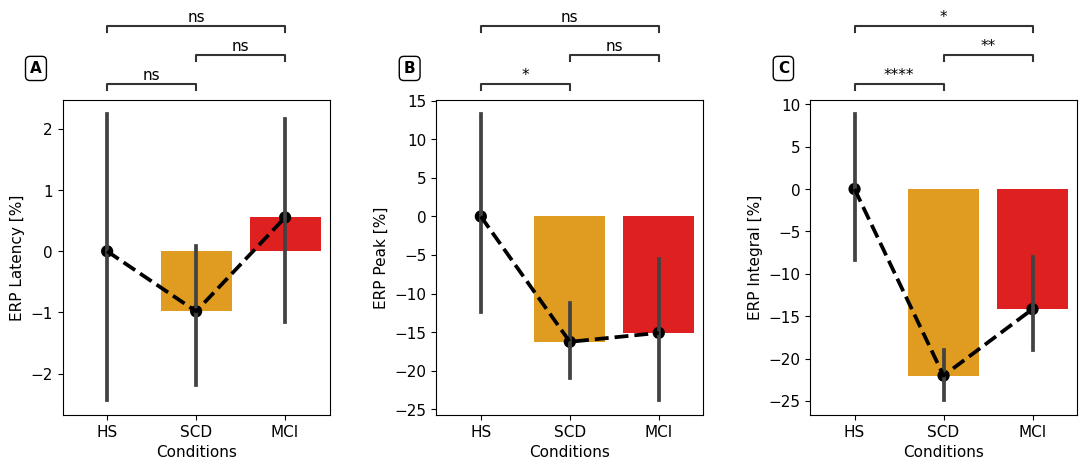

In [45]:
y='valuesRefHS'

fig, ax = plt.subplots(1,3, figsize=(11,5))
ax = ax.flatten()
r, p = scipy.stats.spearmanr(tab[y], tab['age'])
print('all',r,p)
for idx, i in enumerate(['LAT', 'PEAK', 'INTEGRAL']):
    tab_ = tab[tab['featType']==i]
    #tab_ = tab_[abs(scipy.stats.zscore(tab_[y]))<3]
    r, p = scipy.stats.spearmanr(tab_[y], tab_['age'])
    print(i,r,p)
    
    xx = sns.barplot(
                data=tab_, 
                #inner=None,
                linewidth=1,
                palette=['b', 'orange', 'red'],
                x='cond', 
                order = ['HS', 'SCD', 'MCI'],
                y=y,
                estimator=np.mean,
                ax=ax[idx])
    for violin, alpha in zip(xx.collections[::1], [.75, .75, .75]):
        violin.set_alpha(alpha)
    sns.pointplot(
                  data=tab_, 
                  color='k',
                  x='cond', 
                  order = ['HS', 'SCD', 'MCI'],
                  y=y,
                  ci=0,
                  estimator=np.mean,
                  linestyles='--',
                  ax=ax[idx])
    test_results = add_stat_annotation(
                        ax=ax[idx],
                        data=tab_,
                        order=['HS', 'SCD', 'MCI'],
                        y=y,
                        x='cond',
                        text_format='star', 
                        comparisons_correction='bonferroni',
                        test='Kruskal', loc='outside', verbose=2,
                        box_pairs=[
                           ('HS', 'MCI'),('SCD', 'HS'),('MCI', 'SCD')
                             ])
    if i=='LAT': a = 'ERP Latency [%]'
    if i=='PEAK': a = 'ERP Peak [%]'
    if i=='INTEGRAL': a = 'ERP Integral [%]'
        
    ax[idx].set_ylabel(a)
 # Aggiungi lettere in alto a destra su ciascun plot
    ax[idx].annotate(letters[idx], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                    va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                    edgecolor='k', boxstyle='round,pad=0.3'))
    ax[idx].set_xlabel('Conditions')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_HSrelationFeats.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)




In [46]:
scipy.stats.spearmanr(tab['valuesRefHS'][tab['featType']=='INTEGRAL'],tab['age'][tab['featType']=='INTEGRAL'])

SignificanceResult(statistic=0.04206562745527026, pvalue=0.17691719539100872)

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from datetime import datetime

# Assume df_merge_cleaned, SCD, MCI are defined appropriately

def computeRadar(df_radar, condition, valueType, colors, type, ylims, ax, titleLeg, titleFig, letter, legend, note, REF, REFCOLOR):
    features = [f'TCVT_P2_{type}_O', 
                f'TCVT_N1_{type}_O', 
                f'TCVT_P1_{type}_O', 
                f'TCVT_P900_{type}_C',
                f'TCVT_P600_{type}_C', 
                f'TCVT_P300_{type}_C', 
               ]
    features_ = [f'P2', f'N1', f'P1', f'P900', f'P600', f'P300']
    levels = np.unique(df_radar[condition])
    fontsize = 16
    operator = np.mean
    error_operator = np.std
    for level, color in zip(levels, colors):
        n_level = sum(df_radar[condition] == level)

        data = [
            (operator(df_radar[df_radar['feat']==feat][valueType][df_radar[condition] == level]))
            for feat in features
        ]
        errors = [
            (error_operator(df_radar[df_radar['feat']==feat][valueType][df_radar[condition] == level]))
            for feat in features
        ]
        values = data + data[:1]
        errors = errors + errors[:1]
        num_vars = len(features)
        angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
        angles += angles[:1]
    
        listValue=[]
        for angle, value in zip(angles[:-1], values[:-1]):
            listValue.append(value)
            ax.annotate(f'{value:.2f}%', xy=(angle, value), xytext=(angle, value * 1.1),fontweight='bold',
                        ha='center', va='center', fontsize=fontsize, color='k')
        perc=np.median(listValue)

        
        # Plot dei dati con le barre di errore
        ax.plot(angles, values, linewidth=1, color=color, label=note+f'\n(⬡={perc:.2f}%)')
        ax.fill(angles, values, color, alpha=0.5)
        #ax.errorbar(angles[:-1], data, yerr=np.abs(errors[:-1]), fmt='o', color=color, capsize=5, alpha=0.5)

        ax.set_ylim(ylims)
        ax.set_yticklabels([])
        ax.tick_params(axis='y', labelsize=fontsize)
        ax.set_yticks(np.linspace(*ylims, num=1))
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features_)
        #ax.set_title(f'{titleFig} [%]')
        ax.set_ylim(ylims)
        
        # Aggiungi una linea circolare nera al valore zero
        ax.plot(angles, [0]* len(angles), color=REFCOLOR, linewidth=1, linestyle='-', label=REF)
        ax.fill(angles, [0]* len(angles), REFCOLOR, alpha=0.05)        

        # Aggiungi lettere in alto a destra su ciascun plot
        ax.annotate(letter, xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                    va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                    edgecolor='k', boxstyle='round,pad=0.3'))

    def simbol(pvalue):
        if pvalue < 0.0001:
            return '****'
        elif pvalue < 0.001:
            return '***'
        elif pvalue < 0.01:
            return '**'
        elif pvalue < 0.05:
            return '*'
        elif pvalue < 0.1:
            return '~'
        else:
            return ' '
            
    # Lista per le ticklabels aggiornate
    updated_ticklabels = []

    # Calcola il test di Kruskal-Wallis e aggiungi simboli alle ticklabels
    for feat in features_:
        a = df_radar[df_radar['featName']==feat][valueType]
        b = tab[(tab['featName']==feat) & (tab['cond'] == REF)][valueType]
        h, p = kruskal(a, b)  # Calcola il test di Kruskal-Wallis
        if p<0.05:         
            rage, page = scipy.stats.spearmanr(a, df_radar[df_radar['featName']==feat]['age'])
            print(feat,rage, page)
        # Ottieni il simbolo da aggiungere alla ticklabel
        symbol = simbol(p)
        # Aggiungi la ticklabel aggiornata alla lista
        updated_ticklabels.append(f'{feat}{symbol} \n (H={h:.2f}, p={p:.3f})')
        #print(f"{note} {feat} h={h}, p-value: {p:.4f}")

    # Aggiorna le ticklabels sull'asse x con la lista aggiornata
    ax.set_xticklabels(updated_ticklabels, fontsize=fontsize)
    ax.set_theta_offset(np.deg2rad(90))
    
    if legend:
            ax.legend(fancybox=True, shadow=False, framealpha=0.5, fontsize=fontsize, bbox_to_anchor=(0.825, 0.65, 0.5, 0.5))         

    ax.spines['polar'].set_visible(False)  # Rimuove il bordo


P2 -0.013100699033501632 0.8894813229541507
N1 0.05817926469519184 0.5368318796086426
P1 -0.10261819405687385 0.2751322190709415
P900 0.14322720236295108 0.12674955572585048
P600 0.0003553535000045651 0.9969926910275301
P300 -0.07520069734541052 0.42442972429319714
N1 0.27967594725528616 0.08902372114998082
P300 -0.07621552830449457 0.6492588479024717
P2 -0.013100699033501632 0.8894813229541507
N1 0.05817926469519184 0.5368318796086426
P1 -0.10261819405687385 0.2751322190709415
P900 0.14322720236295108 0.12674955572585048
P600 0.0003553535000045651 0.9969926910275301


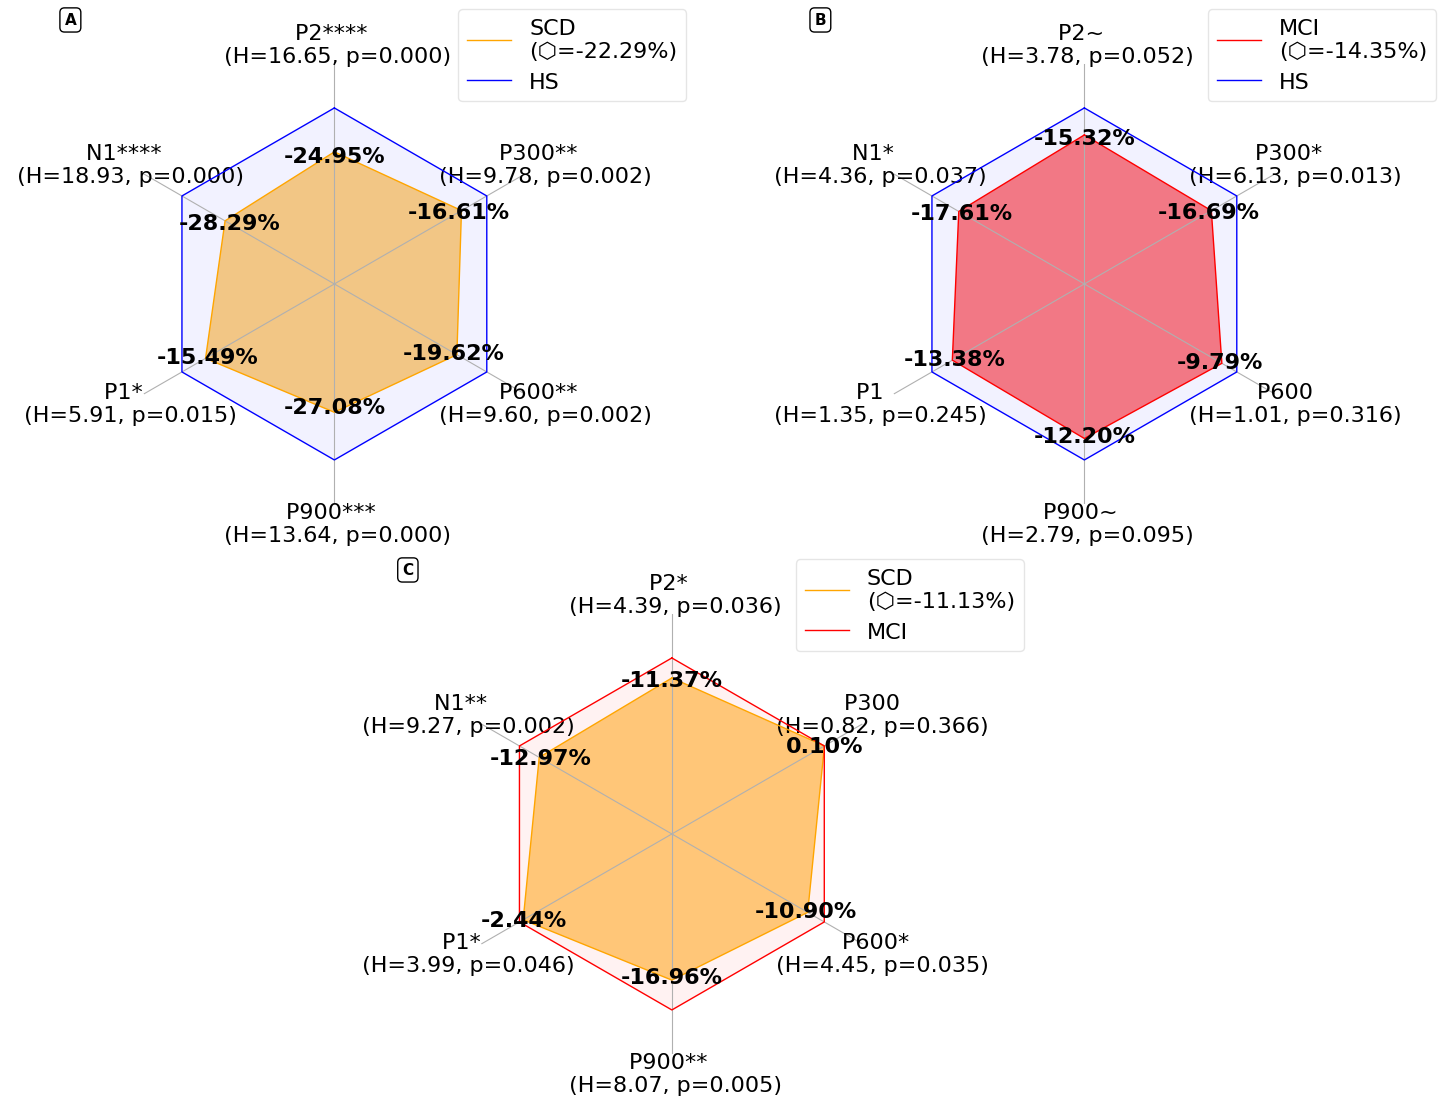

In [48]:
import matplotlib.pyplot as plt
from datetime import datetime

# Dimensioni della figura
fig = plt.figure(figsize=(15, 11))

# Limiti dei radar plot
lims = [-100, 25]

# Creiamo i tre pannelli
ax1 = fig.add_axes([0.05, 0.55, 0.4, 0.4], polar=True)  # Pannello in alto a sinistra
ax2 = fig.add_axes([0.55, 0.55, 0.4, 0.4], polar=True)  # Pannello in alto a destra
ax3 = fig.add_axes([0.275, 0.05, 0.4, 0.4], polar=True)  # Pannello centrale in basso

# Funzioni per generare i radar plot
computeRadar(tab[(tab['featType']=='INTEGRAL') & (tab['cond']=='SCD')], 
             'cond', 'valuesRefHS', ['orange'], 'INTEGRAL', lims, ax1, 'pp', 'ff', letters[0], True, 'SCD', 'HS', 'b')
computeRadar(tab[(tab['featType']=='INTEGRAL') & (tab['cond']=='MCI')], 
             'cond', 'valuesRefHS', ['red'], 'INTEGRAL', lims, ax2, 'pp', 'ff', letters[1], True, 'MCI', 'HS', 'b')
computeRadar(tab[(tab['featType']=='INTEGRAL') & (tab['cond']=='SCD')], 
             'cond', 'valuesRefMCI', ['orange'], 'INTEGRAL', lims, ax3, 'pp', 'ff', letters[2], True, 'SCD', 'MCI', 'red')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Salvataggio delle figure
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_main_spyderModel_COND.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)


In [49]:
for i in ['P1', 'N1', 'P2', 'P300', 'P600', 'P900']:
    r, p = scipy.stats.spearmanr(tab['valuesRefHS'][(tab['featType']=='INTEGRAL')&(tab['featName']==i)],tab['age'][(tab['featType']=='INTEGRAL')&(tab['featName']==i)])
    print(i,r,p)

P1 0.027206282241521274 0.7231359085809796
N1 0.12154570008438853 0.1122122248870019
P2 0.04851067256821518 0.52742311069415
P300 -0.08811541147527142 0.25037729900199407
P600 0.01491873677950364 0.8459867880921031
P900 0.14274743855250788 0.06175622545420094


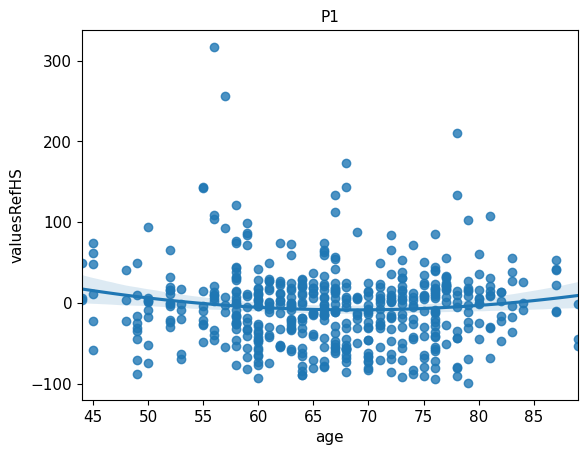

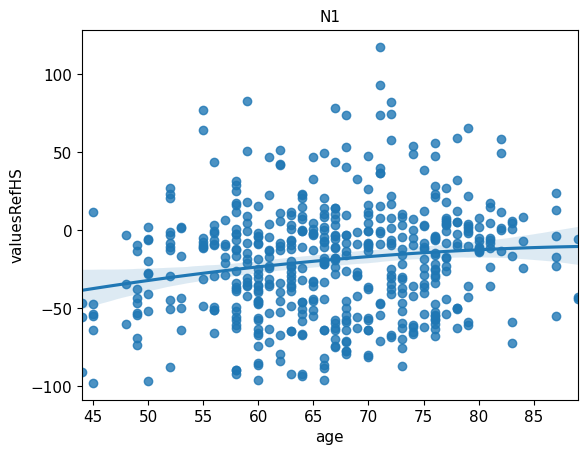

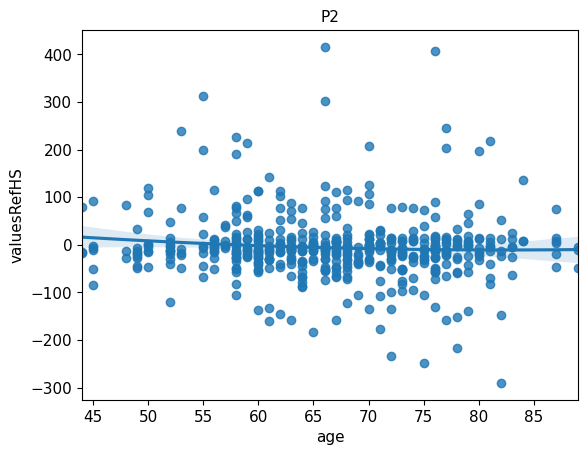

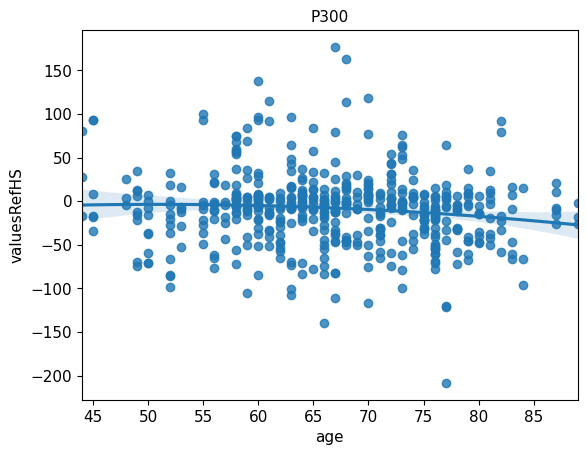

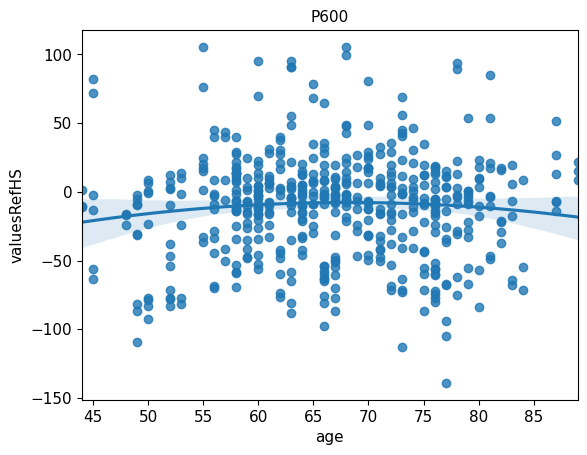

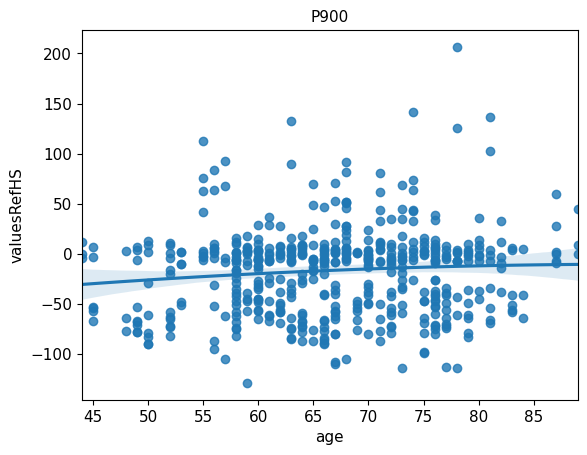

In [50]:
for i in ['P1', 'N1', 'P2', 'P300', 'P600', 'P900']:
    plt.figure()
    plt.title(i)
    sns.regplot(data=tab[tab['featName']==i], y='valuesRefHS', x='age', order=2, scatter=True)

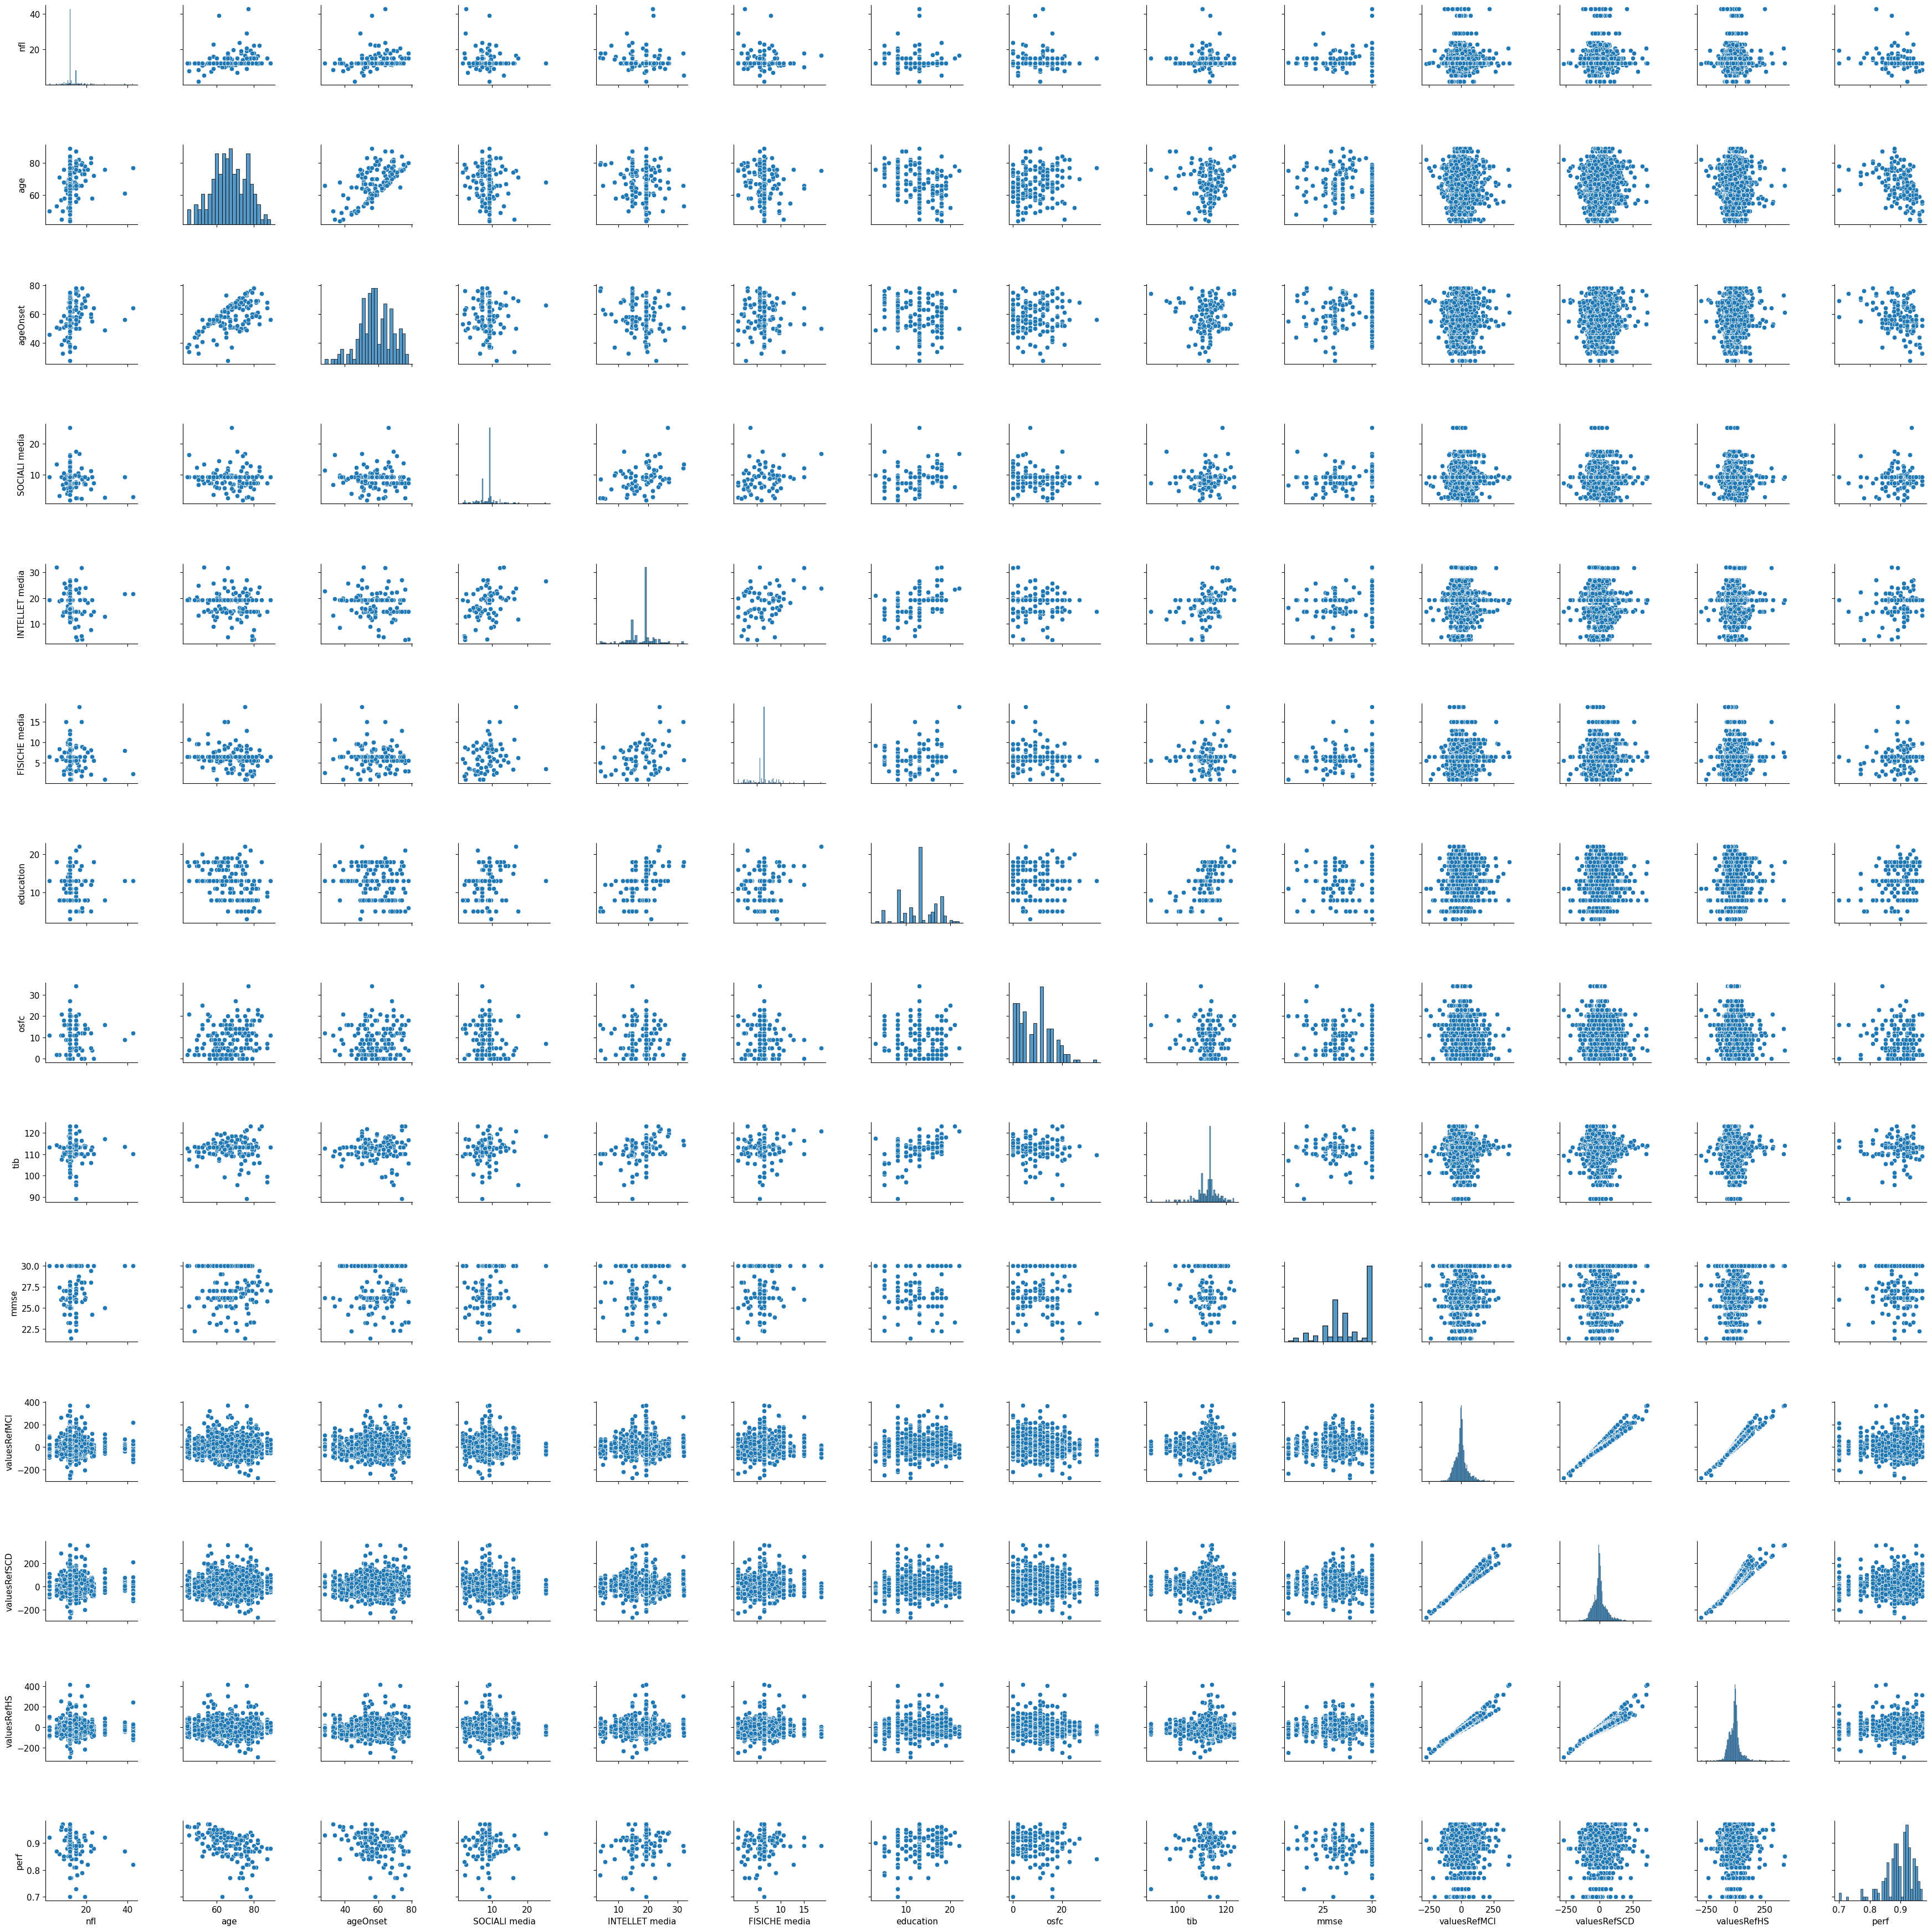

In [51]:
sns.pairplot(tab[['nfl', 'age', 'ageOnset', 
                 'SOCIALI media', 'INTELLET media', 'FISICHE media',
                 'education', 'osfc', 'tib', 'mmse', 'valuesRefMCI','valuesRefSCD','valuesRefHS','perf']])

# Aggiustamento del layout dei subplot
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.75)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_supporting_corrFEATS.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)

### correlations

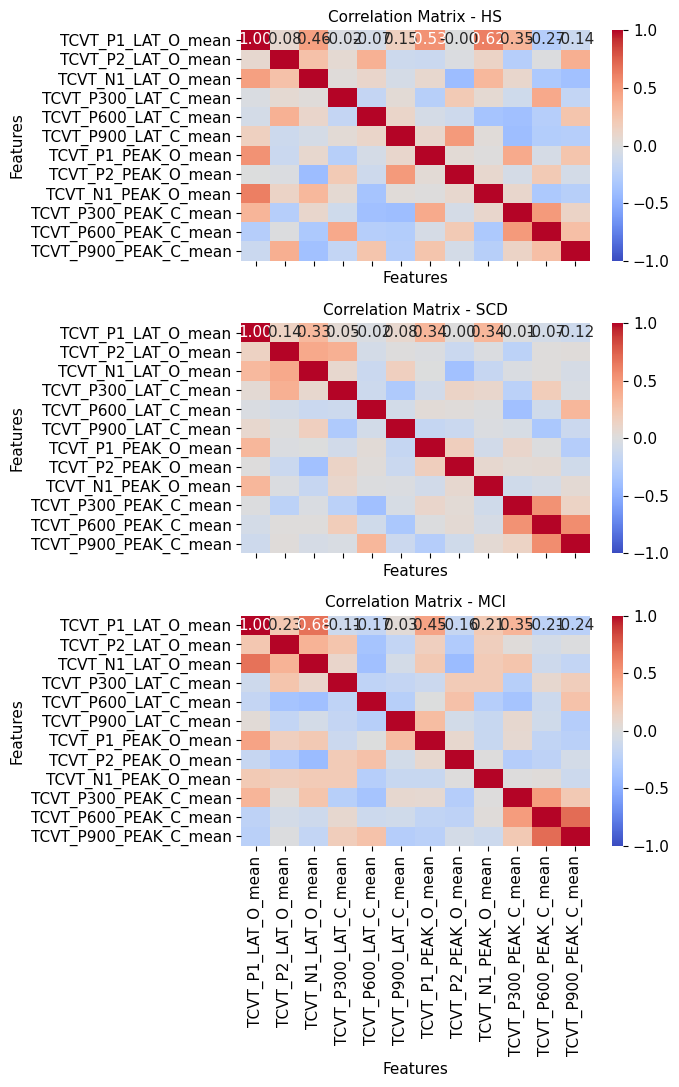

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats


masks = ['HS', 'SCD', 'MCI']  # Elenca qui le tue maschere

# Calcola le matrici di correlazione per ogni maschera
correlation_matrices = {}
for mask in masks:
    matrix = np.zeros((len(FEATURES['NEURAL_noFCnoINT_mean']), len(FEATURES['NEURAL_noFCnoINT_mean'])))
    for i, featx in enumerate(FEATURES['NEURAL_noFCnoINT_mean']):
        for j, featy in enumerate(FEATURES['NEURAL_noFCnoINT_mean']):
            r, p = scipy.stats.spearmanr(df_merge_cleaned[featx][df_merge_cleaned['Conditions']==mask], df_merge_cleaned[featy][df_merge_cleaned['Conditions']==mask])
            matrix[i, j] = r
    correlation_matrices[mask] = matrix

# Crea le heatmap per ogni maschera
fig, axes = plt.subplots(3, 1, figsize=(7, 11), sharey=True, sharex=True)
for i, mask in enumerate(masks):
    ax = axes[i]
    sns.heatmap(correlation_matrices[mask], 
                annot=True, cmap='coolwarm', fmt='.2f', ax=ax, 
                vmin=-1, vmax=1,
                xticklabels=FEATURES['NEURAL_noFCnoINT_mean'], yticklabels=FEATURES['NEURAL_noFCnoINT_mean'])
    ax.set_title(f'Correlation Matrix - {mask}')
    ax.set_xlabel('Features')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()


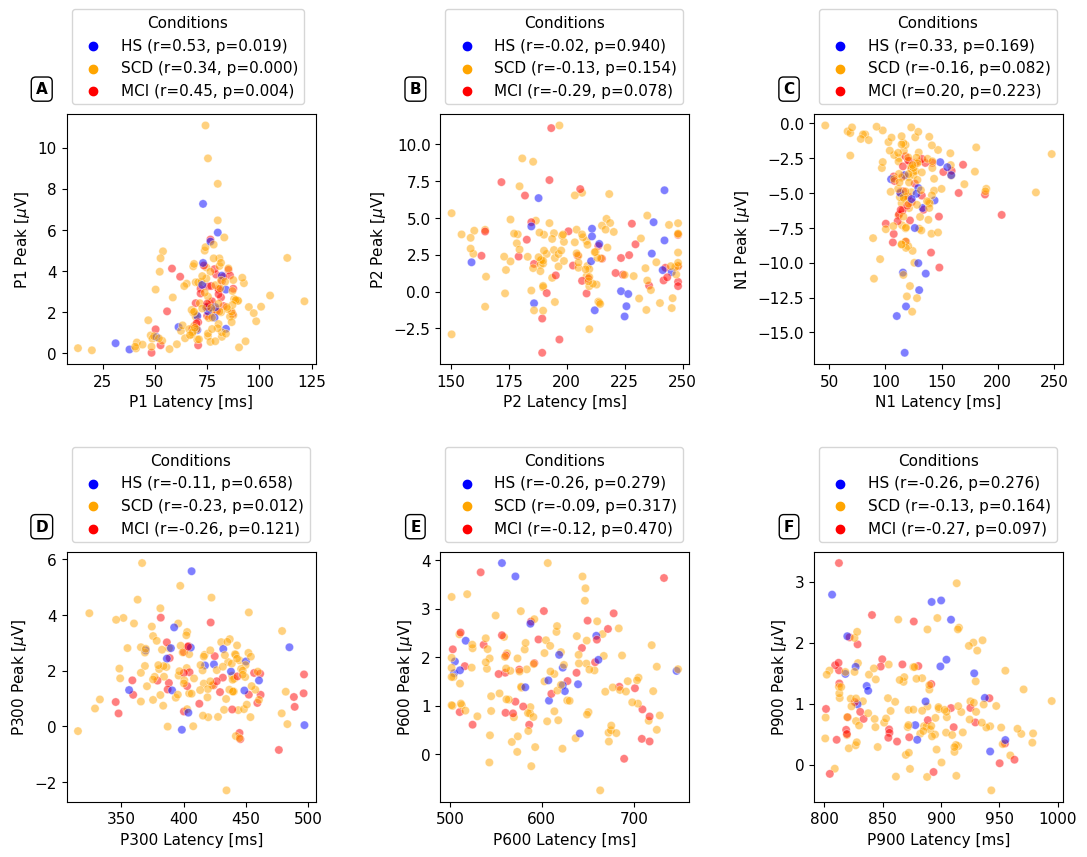

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

# Definizione delle feature di latenza e picco
latency_features = ['TCVT_P1_LAT_O_mean', 'TCVT_P2_LAT_O_mean', 'TCVT_N1_LAT_O_mean',
                    'TCVT_P300_LAT_C_mean', 'TCVT_P600_LAT_C_mean', 'TCVT_P900_LAT_C_mean']
peak_features = ['TCVT_P1_PEAK_O_mean', 'TCVT_P2_PEAK_O_mean', 'TCVT_N1_PEAK_O_mean',
                 'TCVT_P300_PEAK_C_mean', 'TCVT_P600_PEAK_C_mean', 'TCVT_P900_PEAK_C_mean']

# Creazione dei subplot per gli scatter plot
fig, axes = plt.subplots(2, 3, figsize=(11, 9))

# Definizione delle maschere
masks = {
    'HS': df_merge_cleaned['Conditions'] == 'HS',
    'SCD': df_merge_cleaned['Conditions'] == 'SCD',
    'MCI': df_merge_cleaned['Conditions'] == 'MCI'
}

# Iterazione per creare gli scatter plot e calcolare la correlazione
for i in range(len(latency_features)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Creazione dello scatter plot con Seaborn
    sns.scatterplot(x=df_merge_cleaned[latency_features[i]], 
                    y=df_merge_cleaned[peak_features[i]], 
                    hue=df_merge_cleaned['Conditions'], 
                    palette = ['b', 'orange', 'r'],
                             hue_order=['HS', 'SCD', 'MCI'],

                    ax=ax, alpha=0.5)
    
    # Lista per memorizzare le informazioni sulla correlazione per la legenda
    legend_labels = []
    
    # Calcolo della correlazione di Spearman e aggiunta della regline se significativa
    for condition, mask in masks.items():
        r, p = spearmanr(df_merge_cleaned[latency_features[i]][mask], df_merge_cleaned[peak_features[i]][mask])
        
        # Informazioni sulla legenda con numero di campioni e correlazione
        sample_size = np.sum(mask)
        legend_labels.append(f'{condition} (r={r:.2f}, p={p:.3f})')
        
    
    ax.set_xlabel(f'{latency_features[i].split("_")[1]} Latency [ms]')
    ax.set_ylabel(f'{latency_features[i].split("_")[1]} Peak [$\mu$V]')
    # Aggiungi lettere in alto a destra su ciascun plot
    ax.annotate(letters[i], xy=(-0.1, 1.1), xycoords='axes fraction', fontsize=11, ha='center', 
                va='center', fontweight='bold', color='k', bbox=dict(facecolor='white', 
                edgecolor='k', boxstyle='round,pad=0.3'))

    #ax.legend(title='Conditions', labels=legend_labels, loc='upper left', bbox_to_anchor=[-0.01, 0.45, 1,1])
    # Ottieni handle e labels dalla leggenda attuale e modifica le etichette
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=legend_labels, title='Conditions', loc='upper left', bbox_to_anchor=[-0.01, 0.45, 1, 1])

    
# Aggiustamento del layout dei subplot
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.75)
for f in ['png', 'pdf']:
    now = datetime.now()
    date = now.strftime("%Y%m%d%H%M%S")
    nameFig = f'{experiment_dir}{date}_supporting_corRTPEAK.{f}'
    plt.savefig(nameFig, bbox_inches='tight', dpi=400)